# All protocol consolidation

## Importing other Python Libraries/Modules

In [1]:
import re
import os
import sys
import string
from collections import defaultdict
import glob
import warnings
from datetime import datetime
from datetime import timedelta
import ast
import itertools

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import xlrd
import seaborn as sn
import matplotlib as mpl
mpl.rc('font',family='Arial')

In [5]:
# setting path
sys.path.append('../../../src')

In [7]:
from elorating import *

In [8]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

# Summary

- Experiment

- Data

- Purpose of this Jupyter Notebook


In [11]:
all_final_elo_score_file_paths = glob.glob("../../2023_04_27_pilot_*_elo_rating_calculation/proc/elo_rating_spread_sheets/*/*final-elo-rating.csv", recursive=True)

In [12]:
all_final_elo_score_file_paths

['../../2023_04_27_pilot_2_elo_rating_calculation/proc/elo_rating_spread_sheets/reward_competition/pilot_2_cages-1-2-3-4-5-6_rc_20220728_20220729_final-elo-rating.csv',
 '../../2023_04_27_pilot_2_elo_rating_calculation/proc/elo_rating_spread_sheets/home_cage_observation/pilot_2_cages-1-2-3-4-5-6_hco_2012-08-11_2022-08-11_final-elo-rating.csv',
 '../../2023_04_27_pilot_2_elo_rating_calculation/proc/elo_rating_spread_sheets/urine_marking/pilot_2_cages-1-2-3-4-5-6_uma_2022-07-11_2022-08-08_final-elo-rating.csv',
 '../../2023_04_27_pilot_2_elo_rating_calculation/proc/elo_rating_spread_sheets/tube_test/pilot_2_cages-1-2-3-4-5-6_tt_2022-07-11_2022-07-29_final-elo-rating.csv',
 '../../2023_04_27_pilot_1_elo_rating_calculation/proc/elo_rating_spread_sheets/reward_competition/pilot_1_cages-1-2-3-4_rc_20220519_20220520_final-elo-rating.csv',
 '../../2023_04_27_pilot_1_elo_rating_calculation/proc/elo_rating_spread_sheets/home_cage_observation/pilot_1_cages-3-4_hco_2022-05-02_2022-05-13_final-elo-

In [13]:
len(all_final_elo_score_file_paths)

12

In [14]:
all_final_elo_score_df = []
for file_path in all_final_elo_score_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    per_experiment_df["subject_id"] = per_experiment_df["subject_id"].astype(float).astype(str)
    print(file_path)
    print(per_experiment_df["subject_id"].unique())
    all_final_elo_score_df.append(per_experiment_df)

../../2023_04_27_pilot_2_elo_rating_calculation/proc/elo_rating_spread_sheets/reward_competition/pilot_2_cages-1-2-3-4-5-6_rc_20220728_20220729_final-elo-rating.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4' '5.1' '5.2' '5.3' '5.4' '6.1' '6.2' '6.3' '6.4']
../../2023_04_27_pilot_2_elo_rating_calculation/proc/elo_rating_spread_sheets/home_cage_observation/pilot_2_cages-1-2-3-4-5-6_hco_2012-08-11_2022-08-11_final-elo-rating.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4' '5.1' '5.2' '5.3' '5.4' '6.1' '6.2' '6.3' '6.4']
../../2023_04_27_pilot_2_elo_rating_calculation/proc/elo_rating_spread_sheets/urine_marking/pilot_2_cages-1-2-3-4-5-6_uma_2022-07-11_2022-08-08_final-elo-rating.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4' '5.1' '5.2' '5.3' '5.4' '6.1' '6.2' '6.3' '6.4']
../../2023_04_27_pilot_2_elo_rating_calculation/proc/elo

In [15]:
combined_final_elo_score_df = pd.concat(all_final_elo_score_df)
combined_final_elo_score_df = combined_final_elo_score_df.reset_index(drop=True)

In [16]:
combined_final_elo_score_df.head()

,subject_id,final_elo_rating,cohort,strain,cage,experiment_type,rank,cage_num_of_subject
0,1.1,1124.8,pilot_2,C57,1.0,reward_competition,1.0,NaN
1,1.2,1058.3,pilot_2,C57,1.0,reward_competition,2.0,NaN
2,1.3,905.2,pilot_2,C57,1.0,reward_competition,4.0,NaN
3,1.4,911.7,pilot_2,C57,1.0,reward_competition,3.0,NaN
4,2.1,805.2,pilot_2,C57,2.0,reward_competition,4.0,NaN


In [17]:
combined_final_elo_score_df["subject_id"].unique()

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4'], dtype=object)

In [18]:
combined_final_elo_score_df.tail()

,subject_id,final_elo_rating,cohort,strain,cage,experiment_type,rank,cage_num_of_subject
231,5.4,1165.3,pilot_3,CD1,NaN,tube_test,1.0,5.0
232,6.1,1137.7,pilot_3,CD1,NaN,tube_test,1.0,6.0
233,6.2,1021.2,pilot_3,CD1,NaN,tube_test,2.0,6.0
234,6.3,1006.6,pilot_3,CD1,NaN,tube_test,3.0,6.0
235,6.4,834.5,pilot_3,CD1,NaN,tube_test,4.0,6.0


In [19]:
combined_final_elo_score_df

,subject_id,final_elo_rating,cohort,strain,cage,experiment_type,rank,cage_num_of_subject
0,1.1,1124.8,pilot_2,C57,1.0,reward_competition,1.0,NaN
1,1.2,1058.3,pilot_2,C57,1.0,reward_competition,2.0,NaN
2,1.3,905.2,pilot_2,C57,1.0,reward_competition,4.0,NaN
3,1.4,911.7,pilot_2,C57,1.0,reward_competition,3.0,NaN
4,2.1,805.2,pilot_2,C57,2.0,reward_competition,4.0,NaN
...,...,...,...,...,...,...,...,...
231,5.4,1165.3,pilot_3,CD1,NaN,tube_test,1.0,5.0
232,6.1,1137.7,pilot_3,CD1,NaN,tube_test,1.0,6.0
233,6.2,1021.2,pilot_3,CD1,NaN,tube_test,2.0,6.0
234,6.3,1006.6,pilot_3,CD1,NaN,tube_test,3.0,6.0


In [24]:
# experiment_to_elo_score_df = defaultdict(dict)
all_experiment_df = []
for experiment in combined_final_elo_score_df["experiment_type"].unique():
    experiment_df = combined_final_elo_score_df[combined_final_elo_score_df["experiment_type"] == experiment].copy()
    experiment_df = experiment_df.rename(columns={'final_elo_rating': "{}_final_elo_rating".format(experiment), 'rank': "{}_rank".format(experiment)})
    experiment_df = experiment_df.drop(columns=["experiment_type"])
    experiment_df["subject_id"] = experiment_df["subject_id"].astype(str)
    experiment_df["cage"] = experiment_df["cage"].astype(str)
    all_experiment_df.append(experiment_df)

merged_final_elo_score_df = None
matching_columns = ["subject_id", "cohort"]
for experiment_df in all_experiment_df:
    if merged_final_elo_score_df is None:
        merged_final_elo_score_df = experiment_df 
    else:
        cols_to_use = list(merged_final_elo_score_df.columns.difference(experiment_df.columns)) + matching_columns
        merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df[cols_to_use],  how='right', left_on = matching_columns, right_on = matching_columns)
#         break
merged_final_elo_score_df = merged_final_elo_score_df.drop_duplicates(subset=matching_columns, keep="last")
merged_final_elo_score_df = merged_final_elo_score_df.reset_index(drop=True)

In [25]:
merged_final_elo_score_df = merged_final_elo_score_df[sorted(merged_final_elo_score_df.columns)]
merged_final_elo_score_df = merged_final_elo_score_df.sort_values(["cohort", "subject_id"])

In [26]:
merged_final_elo_score_df

,cage,cage_num_of_subject,cohort,home_cage_observation_final_elo_rating,home_cage_observation_rank,reward_competition_final_elo_rating,reward_competition_rank,strain,subject_id,tube_test_final_elo_rating,tube_test_rank,urine_marking_final_elo_rating,urine_marking_rank
24,nan,1.0,pilot_1,NaN,NaN,1088.8,1.0,C57,1.1,1062.2,2.0,1010.3,2.0
25,nan,1.0,pilot_1,NaN,NaN,1067.1,2.0,C57,1.2,927.1,3.0,1000.8,3.0
26,nan,1.0,pilot_1,NaN,NaN,904.3,4.0,C57,1.3,775.7,4.0,972.0,4.0
27,nan,1.0,pilot_1,NaN,NaN,939.8,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
28,nan,2.0,pilot_1,NaN,NaN,1061.3,1.0,C57,2.1,1122.6,2.0,1037.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,nan,5.0,pilot_3,940.6,3.0,963.0,3.0,CD1,5.4,1165.3,1.0,1019.7,1.0
60,nan,6.0,pilot_3,NaN,NaN,974.5,3.0,CD1,6.1,1137.7,1.0,980.6,3.0
61,nan,6.0,pilot_3,NaN,NaN,751.8,4.0,CD1,6.2,1021.2,2.0,980.6,3.0
62,nan,6.0,pilot_3,NaN,NaN,1244.4,1.0,CD1,6.3,1006.6,3.0,1028.8,1.0


In [28]:
merged_final_elo_score_df.loc[(merged_final_elo_score_df["home_cage_observation_final_elo_rating"].isna()) & (merged_final_elo_score_df["cohort"] != "pilot_1") , 'home_cage_observation_final_elo_score'] = 1000

In [29]:
merged_final_elo_score_df

,cage,cage_num_of_subject,cohort,home_cage_observation_final_elo_rating,home_cage_observation_rank,reward_competition_final_elo_rating,reward_competition_rank,strain,subject_id,tube_test_final_elo_rating,tube_test_rank,urine_marking_final_elo_rating,urine_marking_rank,home_cage_observation_final_elo_score
24,nan,1.0,pilot_1,NaN,NaN,1088.8,1.0,C57,1.1,1062.2,2.0,1010.3,2.0,NaN
25,nan,1.0,pilot_1,NaN,NaN,1067.1,2.0,C57,1.2,927.1,3.0,1000.8,3.0,NaN
26,nan,1.0,pilot_1,NaN,NaN,904.3,4.0,C57,1.3,775.7,4.0,972.0,4.0,NaN
27,nan,1.0,pilot_1,NaN,NaN,939.8,3.0,C57,1.4,1235.0,1.0,1016.9,1.0,NaN
28,nan,2.0,pilot_1,NaN,NaN,1061.3,1.0,C57,2.1,1122.6,2.0,1037.4,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,nan,5.0,pilot_3,940.6,3.0,963.0,3.0,CD1,5.4,1165.3,1.0,1019.7,1.0,NaN
60,nan,6.0,pilot_3,NaN,NaN,974.5,3.0,CD1,6.1,1137.7,1.0,980.6,3.0,1000.0
61,nan,6.0,pilot_3,NaN,NaN,751.8,4.0,CD1,6.2,1021.2,2.0,980.6,3.0,1000.0
62,nan,6.0,pilot_3,NaN,NaN,1244.4,1.0,CD1,6.3,1006.6,3.0,1028.8,1.0,1000.0


In [30]:
merged_final_elo_score_df.to_csv("./proc/combined_final_elo_score_df.csv")

## Combining all the pair wise

In [31]:
all_pairwise_file_paths = glob.glob("./pilot_*/**/*pair*.csv", recursive=True)

In [21]:
all_pairwise_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/pilot_1_tube_test_grouped_by_pairs_cage_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/pilot_1_home_cage_observation_grouped_by_pairs_cage_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/pilot_1_urine_marking_grouped_by_pairs_cage_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/pilot_1_reward_competition_grouped_by_pairs_cage_1_2_3_4_date_20220519_20220520.csv',
 './pilot_3/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-09-06_2022-09-27/pilot_3_tube_test_grouped_by_pairs_cage_1_2_3_4_5_6_date_2022-09-06_2022-09-27.csv',
 './pilot_3/proc/elo_score_spread_sheets/home_ca

In [22]:
protocols_list = ["urine", "tube", "home_cage", "reward"]

In [23]:
protocol_to_all_df = defaultdict(list)
for protocol in protocols_list:
    for file_path in all_pairwise_file_paths:
        if protocol in file_path:
            protocol_to_all_df[protocol].append(pd.read_csv(file_path, index_col=0))

In [24]:
# protocol_to_concatted_df = defaultdict(dict)
all_protocol_df_list = []
for k, v in protocol_to_all_df.items():
    
#     protocol_to_concatted_df[k] = pd.concat(v)
    all_protocol_df_list.append(pd.concat(v).reset_index(drop=True))

In [25]:
# all_protocol_df_list[0]

all_protocol_df_list[0][all_protocol_df_list[0]["tuple_animal_id"] == "('1.1', '1.2')"]

,tuple_animal_id,first_spot_number,second_spot_number,processed_cage_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,uma_averaged_loser
0,"('1.1', '1.2')",69.0,10.5,1,pilot_1,C57,58.5,147.169811,False,False,False,1.1,1.2
24,"('1.1', '1.2')",1.0,1.0,1,pilot_3,C57,0.0,0.000000,True,True,True,1.2,1.1
60,"('1.1', '1.2')",14.0,28.0,1,pilot_2,C57,14.0,66.666667,False,False,False,1.2,1.1


In [26]:
all_protocol_df_list[1].head()

,tt_tuple_animal_id,tt_winner,tt_loser,processed_cage_number,cohort,tt_averaged_winner,tt_averaged_loser,tt_winner_count,tt_loser_count,tt_count_difference,tt_match_count,tt_percent_win,tt_percentage_tie
0,"('1.1', '1.2')","['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1....","['1.2', '1.2', '1.2', '1.1', '1.2', '1.2', '1....",1,pilot_1,1.1,1.2,13,1,12,14,0.928571,False
1,"('1.1', '1.3')","['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1....","['1.1', '1.3', '1.3', '1.3', '1.3', '1.3', '1....",1,pilot_1,1.1,1.3,13,1,12,14,0.928571,False
2,"('1.1', '1.4')","['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....","['1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1....",1,pilot_1,1.4,1.1,14,0,14,14,1.000000,False
3,"('1.2', '1.3')","['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1....","['1.3', '1.2', '1.3', '1.3', '1.3', '1.3', '1....",1,pilot_1,1.2,1.3,13,1,12,14,0.928571,False
4,"('1.2', '1.4')","['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....","['1.2', '1.2', '1.2', '1.2', '1.2', '1.2', '1....",1,pilot_1,1.4,1.2,14,0,14,14,1.000000,False


In [27]:
merged_all_protocol_pairwise_df = pd.merge(all_protocol_df_list[0], all_protocol_df_list[1],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['tt_tuple_animal_id','cohort'])

In [28]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[2],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['hco_tuple_animal_id','cohort'])

In [29]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[3],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['rc_animal_ids','cohort'])

/tmp/ipykernel_2286502/2138773678.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'processed_cage_number_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[3],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['rc_animal_ids','cohort'])


In [30]:
columns_to_drop = [col for col in merged_all_protocol_pairwise_df.columns if "cage" in col]

In [31]:
merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df.drop(columns=columns_to_drop)

In [32]:
merged_all_protocol_pairwise_df.sort_values(['cohort', "tuple_animal_id"]).to_csv("./proc/merged_all_protocol_pairwise_df.csv")

In [33]:
merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,True,0.000000


In [34]:
merged_all_protocol_pairwise_df["rc_winner"][0]

"['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1.1', '1.2', '1.1', '1.1', '1.1', '1.2', '1.2', '1.2', '1.2', '1.2', '1.1', '1.2', '1.1', '1.1', '1.1', 'tie', '1.2', 'tie', '1.2', 'tie', '1.1', 'tie', '1.1', 'tie', 'tie', '1.1', '1.2', '1.2', 'tie', 'tie', 'tie', '1.1', 'tie']"

- Chaning all the hco columns to NA if C57 in pilot 1

In [35]:
merged_all_protocol_pairwise_df["hco_percentage_tie"] = merged_all_protocol_pairwise_df["hco_percentage_tie"].fillna(True)

In [36]:
hco_col = [col for col in merged_all_protocol_pairwise_df.columns if "hco" in col]

In [37]:
for col in hco_col:
    merged_all_protocol_pairwise_df.loc[(merged_all_protocol_pairwise_df["cohort"] == "pilot_1") & (merged_all_protocol_pairwise_df["strain"] == "C57"), col] = np.nan

In [38]:
merged_all_protocol_pairwise_df.loc[(merged_all_protocol_pairwise_df["cohort"] == "pilot_1") & (merged_all_protocol_pairwise_df["strain"] == "C57"), "hco_percentage_tie"] = np.nan

In [39]:
merged_all_protocol_pairwise_df[(merged_all_protocol_pairwise_df["cohort"] == "pilot_1") & (merged_all_protocol_pairwise_df["strain"] == "C57")]["hco_percentage_tie"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
Name: hco_percentage_tie, dtype: object

# TODO

In [40]:
merged_all_protocol_pairwise_df

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"('6.1', '6.3')",20.0,13.0,pilot_2,CD1,7.0,42.424242,False,False,False,...,6.3,25,10,3,38,15,0.714286,0.657895,False,0.078947
92,"('6.1', '6.4')",38.5,70.0,pilot_2,CD1,31.5,58.064516,False,False,False,...,6.4,35,2,1,38,33,0.945946,0.921053,False,0.026316
93,"('6.2', '6.3')",17.5,27.5,pilot_2,CD1,10.0,44.444444,False,False,False,...,6.2,18,16,4,38,2,0.529412,0.473684,True,0.105263
94,"('6.2', '6.4')",8.0,37.5,pilot_2,CD1,29.5,129.670330,False,False,False,...,6.2,34,1,3,38,33,0.971429,0.894737,False,0.078947


## Filtering for clear dominance pairs

In [41]:
C57_merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["strain"] == "C57"].copy()

In [42]:
CD1_merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["strain"] == "CD1"].copy()

In [43]:
C57_merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,True,0.000000


In [44]:
CD1_merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
12,"('3.1', '3.2')",17.0,12.0,pilot_1,CD1,5.0,34.482759,False,False,False,...,3.2,14,6,0,20,8,0.700000,0.700000,False,0.000000
13,"('3.1', '3.3')",24.0,0.0,pilot_1,CD1,24.0,200.000000,False,False,False,...,3.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
14,"('3.1', '3.4')",27.0,23.0,pilot_1,CD1,4.0,16.000000,True,True,True,...,3.4,42,16,1,59,26,0.724138,0.711864,False,0.016949
15,"('3.2', '3.3')",51.0,0.0,pilot_1,CD1,51.0,200.000000,False,False,False,...,3.3,20,15,4,39,5,0.571429,0.512821,True,0.102564
16,"('3.2', '3.4')",10.0,28.0,pilot_1,CD1,18.0,94.736842,False,False,False,...,3.4,25,11,2,38,14,0.694444,0.657895,False,0.052632


In [45]:
merged_all_protocol_pairwise_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

- Cross checking with hand scored results

In [46]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "hco_averaged_winner", "hco_percentage_tie", "hco_percent_win", "hco_action"]].tail(n=50)

,tuple_animal_id,cohort,hco_averaged_winner,hco_percentage_tie,hco_percent_win,hco_action
46,"('4.2', '4.4')",pilot_3,4.2,True,0.666667,"['f', 'f', 'f']"
47,"('4.3', '4.4')",pilot_3,4.3,True,0.500000,"['f', 'c', 'f', 'c']"
48,"('5.1', '5.2')",pilot_3,NaN,True,NaN,NaN
49,"('5.1', '5.3')",pilot_3,5.1,False,0.938776,"['c', 'c', 'f', 'f', 'f', 'c', 'c', 'f', 'f', ..."
50,"('5.1', '5.4')",pilot_3,NaN,True,NaN,NaN
51,"('5.2', '5.3')",pilot_3,NaN,True,NaN,NaN
52,"('5.2', '5.4')",pilot_3,5.4,True,0.560000,"['c', 'c', 'c', 'f', 'f', 'f', 'c', 'f', 'f', ..."
53,"('5.3', '5.4')",pilot_3,5.3,False,0.833333,"['c', 'f', 'f', 'c', 'f', 'c']"
54,"('6.1', '6.2')",pilot_3,NaN,True,NaN,NaN
55,"('6.1', '6.3')",pilot_3,NaN,True,NaN,NaN


In [47]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "tt_averaged_winner", "tt_percentage_tie", "tt_percent_win", "tt_winner"]].head(n=50)

,tuple_animal_id,cohort,tt_averaged_winner,tt_percentage_tie,tt_percent_win,tt_winner
0,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
1,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
2,"('1.1', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
3,"('1.2', '1.3')",pilot_1,1.2,False,0.928571,"['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1...."
4,"('1.2', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
5,"('1.3', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
6,"('2.1', '2.2')",pilot_1,2.1,False,1.000000,"['2.1', '2.1', '2.1', '2.1', '2.1', '2.1', '2...."
7,"('2.1', '2.3')",pilot_1,2.1,False,1.000000,"['2.1', '2.1', '2.1', '2.1', '2.1', '2.1', '2...."
8,"('2.1', '2.4')",pilot_1,2.4,False,0.750000,"['2.4', '2.4', '2.4', '2.4', '2.4', '2.4', '2...."
9,"('2.2', '2.3')",pilot_1,2.2,False,1.000000,"['2.2', '2.2', '2.2', '2.2', '2.2', '2.2', '2...."


In [48]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "uma_averaged_winner", "uma_number_then_percent_tie", "uma_percent_difference", "uma_number_difference"]].tail(n=50)

,tuple_animal_id,cohort,uma_averaged_winner,uma_number_then_percent_tie,uma_percent_difference,uma_number_difference
46,"('4.2', '4.4')",pilot_3,4.4,False,180.198020,91.0
47,"('4.3', '4.4')",pilot_3,4.4,False,85.714286,36.0
48,"('5.1', '5.2')",pilot_3,5.2,False,126.760563,45.0
49,"('5.1', '5.3')",pilot_3,5.3,True,22.222222,2.0
50,"('5.1', '5.4')",pilot_3,5.4,False,184.660767,313.0
51,"('5.2', '5.3')",pilot_3,5.2,False,125.827815,95.0
52,"('5.2', '5.4')",pilot_3,5.4,False,102.222222,92.0
53,"('5.3', '5.4')",pilot_3,5.4,True,23.529412,4.0
54,"('6.1', '6.2')",pilot_3,6.1,True,28.571429,1.0
55,"('6.1', '6.3')",pilot_3,6.3,False,175.757576,29.0


## Calculating the per stain differences

In [49]:
merged_all_protocol_pairwise_df

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"('6.1', '6.3')",20.0,13.0,pilot_2,CD1,7.0,42.424242,False,False,False,...,6.3,25,10,3,38,15,0.714286,0.657895,False,0.078947
92,"('6.1', '6.4')",38.5,70.0,pilot_2,CD1,31.5,58.064516,False,False,False,...,6.4,35,2,1,38,33,0.945946,0.921053,False,0.026316
93,"('6.2', '6.3')",17.5,27.5,pilot_2,CD1,10.0,44.444444,False,False,False,...,6.2,18,16,4,38,2,0.529412,0.473684,True,0.105263
94,"('6.2', '6.4')",8.0,37.5,pilot_2,CD1,29.5,129.670330,False,False,False,...,6.2,34,1,3,38,33,0.971429,0.894737,False,0.078947


In [50]:
merged_all_protocol_pairwise_df

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"('6.1', '6.3')",20.0,13.0,pilot_2,CD1,7.0,42.424242,False,False,False,...,6.3,25,10,3,38,15,0.714286,0.657895,False,0.078947
92,"('6.1', '6.4')",38.5,70.0,pilot_2,CD1,31.5,58.064516,False,False,False,...,6.4,35,2,1,38,33,0.945946,0.921053,False,0.026316
93,"('6.2', '6.3')",17.5,27.5,pilot_2,CD1,10.0,44.444444,False,False,False,...,6.2,18,16,4,38,2,0.529412,0.473684,True,0.105263
94,"('6.2', '6.4')",8.0,37.5,pilot_2,CD1,29.5,129.670330,False,False,False,...,6.2,34,1,3,38,33,0.971429,0.894737,False,0.078947


In [51]:
tie_columns = ["rc_is_win_to_win_and_loss_ratio_tie", "hco_percentage_tie", "uma_number_then_percent_tie", "tt_percentage_tie"]

In [52]:
for col in tie_columns:
    merged_all_protocol_pairwise_df["{}_value".format(col)] = merged_all_protocol_pairwise_df[col]*1

In [53]:
merged_all_protocol_pairwise_df.groupby(["strain", "hco_percentage_tie"]).count()

tuple_animal_id  first_spot_number  \
strain hco_percentage_tie                                       
C57    False                            12                 12   
       True                             24                 24   
CD1    False                            25                 25   
       True                             23                 23   

                           second_spot_number  cohort  uma_number_difference  \
strain hco_percentage_tie                                                      
C57    False                               12      12                     12   
       True                                24      24                     24   
CD1    False                               25      25                     25   
       True                                23      23                     23   

                           uma_percent_difference  uma_number_tie  \
strain hco_percentage_tie                                           
C57    False                                   12              12   
       True                                    24              24   
CD1    False                                   25              25   
       True                                    23              23   

                           uma_percent_tie  uma_number_then_percent_tie  \
strain hco_percentage_tie                                                 
C57    False                            12                           12   
       True                             24                           24   
CD1    False                            25                           25   
       True                             23                           23   

                           uma_averaged_winner  ...  \
strain hco_percentage_tie                       ...   
C57    False                                12  ...   
       True                                 24  ...   
CD1    False                                25  ...   
       True                                 23  ...   

                           rc_all_match_count_including_ties  \
strain hco_percentage_tie                                      
C57    False                                              12   
       True                                               24   
CD1    False                                              25   
       True                                               23   

                           rc_winner_count_minus_loser_count  \
strain hco_percentage_tie                                      
C57    False                                              12   
       True                                               24   
CD1    False                                              25   
       True                                               23   

                           rc_win_to_win_plus_lost_ratio  rc_win_to_all_ratio  \
strain hco_percentage_tie                                                       
C57    False                                          12                   12   
       True                                           24                   24   
CD1    False                                          25                   25   
       True                                           23                   23   

                           rc_is_win_to_win_and_loss_ratio_tie  \
strain hco_percentage_tie                                        
C57    False                                                12   
       True                                                 24   
CD1    False                                                25   
       True                                                 23   

                           rc_tie_to_all_ratio  \
strain hco_percentage_tie                        
C57    False                                12   
       True                                 24   
CD1    False                                25   
       True                                 23   

   

In [54]:
merged_all_protocol_pairwise_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [55]:
merged_all_protocol_pairwise_df.groupby(["strain"]).count()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,...,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie_value,hco_percentage_tie_value,uma_number_then_percent_tie_value,tt_percentage_tie_value
strain,,,,,,,,,,,,,,,,,,,,,
C57,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,36,48,48
CD1,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


In [56]:
tie_ratio_df = (merged_all_protocol_pairwise_df.groupby(["strain"]).mean(numeric_only=False) - 1) * -1

/tmp/ipykernel_2286502/2487970684.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  tie_ratio_df = (merged_all_protocol_pairwise_df.groupby(["strain"]).mean(numeric_only=False) - 1) * -1


In [57]:
tie_ratio_df

,first_spot_number,second_spot_number,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,uma_averaged_loser,tt_averaged_winner,...,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie_value,hco_percentage_tie_value,uma_number_then_percent_tie_value,tt_percentage_tie_value
strain,,,,,,,,,,,,,,,,,,,,,
C57,-16.822917,-20.895833,-23.968750,-100.143234,0.687500,0.875000,0.687500,-1.108333,-1.141667,-1.114583,...,-37.375000,-9.729167,0.341663,0.407896,0.583333,0.909289,0.583333,0.333333,0.687500,0.729167
CD1,-30.861111,-54.842014,-50.904514,-99.409215,0.791667,0.916667,0.770833,-3.904167,-3.845833,-3.872917,...,-37.291667,-13.458333,0.298979,0.345910,0.708333,0.930901,0.708333,0.520833,0.770833,0.770833


In [58]:
merged_all_protocol_pairwise_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [59]:
tie_ratio_df.columns

Index(['first_spot_number', 'second_spot_number', 'uma_number_difference',
       'uma_percent_difference', 'uma_number_tie', 'uma_percent_tie',
       'uma_number_then_percent_tie', 'uma_averaged_winner',
       'uma_averaged_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie',
       'rc_average_number_of_switches', 'rc_averaged_winner',
       'rc_averaged_loser', 'rc_winner_count', 'rc_loser_count',
       'rc_tie_count', 'rc_all_match_count_including_ties',
       'rc_winner_count_minus_loser_count', 'rc_win_to_win_plus_lost_ratio',
       'rc_win_to_all_ratio', 'rc_is_win_to_win_and_loss_ratio_tie',
       'rc_tie_to_all_ratio', 'rc_is_win_to_win_and_loss_ratio_tie_va

In [60]:
tie_to_stable_rename_dict = {"rc_is_win_to_win_and_loss_ratio_tie_value": "rc_stable_pair_ratio", "hco_percentage_tie_value": "hco_stable_pair_ratio", "uma_number_then_percent_tie_value": "uma_stable_pair_ratio", "tt_percentage_tie_value": "tt_stable_pair_ratio"}

In [61]:
tie_ratio_df = tie_ratio_df[[col for col in tie_ratio_df.columns if "value" in col]].rename(columns=tie_to_stable_rename_dict)

In [62]:
tie_ratio_df

,rc_stable_pair_ratio,hco_stable_pair_ratio,uma_stable_pair_ratio,tt_stable_pair_ratio
strain,,,,
C57,0.583333,0.333333,0.687500,0.729167
CD1,0.708333,0.520833,0.770833,0.770833


In [63]:
tie_ratio_df.to_csv("./proc/per_strain_stable_pair_ratio_for_all_pilots.csv")

# Combining all the dataframes

In [64]:
first_merged_final_elo_score_df = merged_final_elo_score_df.copy()
second_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [65]:
first_merged_final_elo_score_df.columns = ["first_{}".format(col) for col in first_merged_final_elo_score_df.columns]
second_merged_final_elo_score_df.columns = ["second_{}".format(col) for col in second_merged_final_elo_score_df.columns]

In [66]:
first_merged_final_elo_score_df

,first_cage,first_cohort,first_home_cage_observation_final_elo_score,first_home_cage_observation_rank,first_reward_competition_final_elo_score,first_reward_competition_rank,first_strain,first_subject_id,first_tube_test_final_elo_score,first_tube_test_rank,first_urine_marking_final_elo_score,first_urine_marking_rank
0,1,pilot_1,NaN,NaN,1165.8,1.0,C57,1.1,1062.2,2.0,1010.3,2.0
1,1,pilot_1,NaN,NaN,1007.3,2.0,C57,1.2,927.1,3.0,1000.8,3.0
2,1,pilot_1,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
3,1,pilot_1,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
4,2,pilot_1,NaN,NaN,1144.7,1.0,C57,2.1,1122.6,2.0,1037.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35,5,pilot_3,940.6,3.0,954.6,3.0,CD1,5.4,1165.3,1.0,1019.7,1.0
36,6,pilot_3,1000.0,NaN,991.0,3.0,CD1,6.1,1137.7,1.0,980.6,3.0
37,6,pilot_3,1000.0,NaN,752.6,4.0,CD1,6.2,1021.2,2.0,980.6,3.0
38,6,pilot_3,1000.0,NaN,1235.4,1.0,CD1,6.3,1006.6,3.0,1028.8,1.0


In [67]:
merged_final_elo_score_df

,cage,cohort,home_cage_observation_final_elo_score,home_cage_observation_rank,reward_competition_final_elo_score,reward_competition_rank,strain,subject_id,tube_test_final_elo_score,tube_test_rank,urine_marking_final_elo_score,urine_marking_rank
0,1,pilot_1,NaN,NaN,1165.8,1.0,C57,1.1,1062.2,2.0,1010.3,2.0
1,1,pilot_1,NaN,NaN,1007.3,2.0,C57,1.2,927.1,3.0,1000.8,3.0
2,1,pilot_1,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
3,1,pilot_1,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
4,2,pilot_1,NaN,NaN,1144.7,1.0,C57,2.1,1122.6,2.0,1037.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35,5,pilot_3,940.6,3.0,954.6,3.0,CD1,5.4,1165.3,1.0,1019.7,1.0
36,6,pilot_3,1000.0,NaN,991.0,3.0,CD1,6.1,1137.7,1.0,980.6,3.0
37,6,pilot_3,1000.0,NaN,752.6,4.0,CD1,6.2,1021.2,2.0,980.6,3.0
38,6,pilot_3,1000.0,NaN,1235.4,1.0,CD1,6.3,1006.6,3.0,1028.8,1.0


In [68]:
second_merged_final_elo_score_df.groupby(['second_subject_id', "second_cohort"]).count()

second_cage  \
second_subject_id second_cohort                
1.1               pilot_1                  1   
                  pilot_2                  1   
                  pilot_3                  1   
1.2               pilot_1                  1   
                  pilot_2                  1   
...                                      ...   
6.2               pilot_3                  1   
6.3               pilot_2                  1   
                  pilot_3                  1   
6.4               pilot_2                  1   
                  pilot_3                  1   

                                 second_home_cage_observation_final_elo_score  \
second_subject_id second_cohort                                                 
1.1               pilot_1                                                   0   
                  pilot_2                                                   1   
                  pilot_3                                                   1   
1.2               pilot_1                                                   0   
                  pilot_2                                                   1   
...                                                                       ...   
6.2               pilot_3                                                   1   
6.3               pilot_2                                                   1   
                  pilot_3                                                   1   
6.4               pilot_2                                                   1   
                  pilot_3                                                   1   

                                 second_home_cage_observation_rank  \
second_subject_id second_cohort                                      
1.1               pilot_1                                        0   
                  pilot_2                                        1   
                  pilot_3                                        0   
1.2               pilot_1                                        0   
                  pilot_2                                        1   
...                                                            ...   
6.2               pilot_3                                        0   
6.3               pilot_2                                        1   
                  pilot_3                                        0   
6.4               pilot_2                                        1   
                  pilot_3                                        0   

                                 second_reward_competition_final_elo_score  \
second_subject_id second_cohort                                              
1.1               pilot_1                                                1   
                  pilot_2                                                1   
                  pilot_3                                                1   
1.2               pilot_1                                                1   
                  pilot_2                                                1   
...                                                                    ...   
6.2               pilot_3                                                1   
6.3               pilot_2                                                1   
                  pilot_3                                                1   
6.4               pilot_2                                                1   
                  pilot_3                                                1   

                                 second_reward_competition_rank  \
second_subject_id second_cohort                                   
1.1               pilot_1                                     1   
                  pilot_2                                     1   
                  pilot_3                                     1   
1.2               pilot_1                                     1   
                  pilot_2 

In [69]:
pd.unique(second_merged_final_elo_score_df[['second_subject_id', 'second_cohort']].values.ravel('K'))

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4', 'pilot_1', 'pilot_2',
       'pilot_3'], dtype=object)

In [70]:
second_merged_final_elo_score_df["second_subject_id"]

0     1.1
1     1.2
2     1.3
3     1.4
4     2.1
     ... 
35    5.4
36    6.1
37    6.2
38    6.3
39    6.4
Name: second_subject_id, Length: 64, dtype: object

In [71]:
merged_all_protocol_pairwise_df["first_tuple_animal_id"] = merged_all_protocol_pairwise_df["tuple_animal_id"].apply(lambda x: ast.literal_eval(x)[0])
merged_all_protocol_pairwise_df["second_tuple_animal_id"] = merged_all_protocol_pairwise_df["tuple_animal_id"].apply(lambda x: ast.literal_eval(x)[1])

In [72]:
pairwise_and_final_elo_score_df = pd.merge(merged_all_protocol_pairwise_df, first_merged_final_elo_score_df,  how='left', left_on=['first_tuple_animal_id','cohort'], right_on = ['first_subject_id','first_cohort'])
pairwise_and_final_elo_score_df = pd.merge(pairwise_and_final_elo_score_df, second_merged_final_elo_score_df,  how='left', left_on=['second_tuple_animal_id','cohort'], right_on = ['second_subject_id','second_cohort'])

In [73]:
pairwise_and_final_elo_score_df

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_strain,second_subject_id,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,NaN,NaN,1007.3,2.0,C57,1.2,927.1,3.0,1000.8,3.0
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"('6.1', '6.3')",20.0,13.0,pilot_2,CD1,7.0,42.424242,False,False,False,...,714.6,4.0,1023.3,2.0,CD1,6.3,910.6,4.0,1009.7,2.0
92,"('6.1', '6.4')",38.5,70.0,pilot_2,CD1,31.5,58.064516,False,False,False,...,1080.4,2.0,911.2,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0
93,"('6.2', '6.3')",17.5,27.5,pilot_2,CD1,10.0,44.444444,False,False,False,...,714.6,4.0,1023.3,2.0,CD1,6.3,910.6,4.0,1009.7,2.0
94,"('6.2', '6.4')",8.0,37.5,pilot_2,CD1,29.5,129.670330,False,False,False,...,1080.4,2.0,911.2,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0


# EDITING START

In [74]:
pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [75]:
pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["rc_is_win_to_win_and_loss_ratio_tie"] == False]

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_strain,second_subject_id,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
6,"('2.1', '2.2')",14.0,3.5,pilot_1,C57,10.5,120.000000,False,False,False,...,NaN,NaN,951.4,3.0,C57,2.2,947.8,3.0,972.0,4.0
8,"('2.1', '2.4')",49.0,19.0,pilot_1,C57,30.0,88.235294,False,False,False,...,NaN,NaN,982.5,2.0,C57,2.4,1148.9,1.0,981.4,3.0
9,"('2.2', '2.3')",3.0,12.0,pilot_1,C57,9.0,120.000000,False,False,False,...,NaN,NaN,921.4,4.0,C57,2.3,780.7,4.0,1009.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,"('5.3', '5.4')",53.5,15.0,pilot_2,CD1,38.5,112.408759,False,False,False,...,1309.0,1.0,901.0,3.0,CD1,5.4,844.8,4.0,1009.5,2.0
91,"('6.1', '6.3')",20.0,13.0,pilot_2,CD1,7.0,42.424242,False,False,False,...,714.6,4.0,1023.3,2.0,CD1,6.3,910.6,4.0,1009.7,2.0
92,"('6.1', '6.4')",38.5,70.0,pilot_2,CD1,31.5,58.064516,False,False,False,...,1080.4,2.0,911.2,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0
94,"('6.2', '6.4')",8.0,37.5,pilot_2,CD1,29.5,129.670330,False,False,False,...,1080.4,2.0,911.2,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0


In [76]:
rc_stable_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["rc_is_win_to_win_and_loss_ratio_tie"] == False]

In [77]:
rc_stable_df[rc_stable_df["hco_percentage_tie"] == False].groupby(["strain"]).count()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,...,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_strain,second_subject_id,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
strain,,,,,,,,,,,,,,,,,,,,,
C57,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
CD1,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [78]:
rc_stable_df[rc_stable_df["tt_percentage_tie"] ==False].groupby(["strain"]).count()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,...,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_strain,second_subject_id,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
strain,,,,,,,,,,,,,,,,,,,,,
C57,21,21,21,21,21,21,21,21,21,21,...,16,9,21,21,21,21,21,21,21,21
CD1,26,26,26,26,26,26,26,26,26,26,...,26,21,26,26,26,26,26,26,26,26


In [79]:
rc_stable_df[rc_stable_df["uma_number_then_percent_tie"] == False].groupby(["strain"]).count()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,...,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_strain,second_subject_id,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
strain,,,,,,,,,,,,,,,,,,,,,
C57,20,20,20,20,20,20,20,20,20,20,...,17,10,20,20,20,20,20,20,20,20
CD1,24,24,24,24,24,24,24,24,24,24,...,24,19,24,24,24,24,24,24,24,24


# EDITING END

In [80]:
pairwise_and_final_elo_score_df.to_csv("./proc/pairwise_and_final_elo_score.csv")

## Making Punnet Squares

In [81]:
pairwise_and_final_elo_score_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_strain,second_subject_id,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,NaN,NaN,1007.3,2.0,C57,1.2,927.1,3.0,1000.8,3.0
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0


In [82]:
pairwise_and_final_elo_score_df["list_animal_id"] = pairwise_and_final_elo_score_df["tuple_animal_id"].apply(lambda x: list(ast.literal_eval(x)))

In [83]:
pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [84]:
exploded_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df.explode('list_animal_id')

In [85]:
exploded_pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [86]:
averaged_winner_loser_columns = [col for col in exploded_pairwise_and_final_elo_score_df if "averaged" in col]

In [87]:
for col in averaged_winner_loser_columns:
    exploded_pairwise_and_final_elo_score_df[col] = exploded_pairwise_and_final_elo_score_df[col].astype(str)
exploded_pairwise_and_final_elo_score_df["list_animal_id"] = exploded_pairwise_and_final_elo_score_df["list_animal_id"].astype(str)

In [88]:
exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "Tie" if x["uma_number_then_percent_tie"] == True else ("Dominant" if x["list_animal_id"] == str(x["uma_averaged_winner"]) else ("Subordinate" if x["list_animal_id"] == str(x["uma_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["hco_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "Tie" if x["hco_percentage_tie"] == True else ("Dominant" if x["list_animal_id"] == str(x["hco_averaged_winner"]) else ("Subordinate" if x["list_animal_id"] == str(x["hco_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "Tie" if x["tt_percentage_tie"] == True else ("Dominant" if x["list_animal_id"] == str(x["tt_averaged_winner"]) else ("Subordinate" if x["list_animal_id"] == str(x["tt_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["rc_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "Tie" if x["rc_is_win_to_win_and_loss_ratio_tie"] == True else ("Dominant" if x["list_animal_id"] == str(x["rc_averaged_winner"]) else ("Subordinate" if x["list_animal_id"] == str(x["rc_averaged_loser"]) else np.nan)), axis=1)
                                                                                                            
                                                                                                            
#                                                                                                             "Dominant" if x["list_animal_id"] == x["uma_averaged_winner"])

In [89]:
dominance_columns = ["uma_dom_tie_sub", "hco_dom_tie_sub", "tt_dom_tie_sub", "rc_dom_tie_sub"]
strains = ["CD1", "C57"]

In [90]:
all_dominance_count_df_list = []
for assay in dominance_columns:
#     print(strain, assay)
    dominance_count_df = pd.DataFrame(exploded_pairwise_and_final_elo_score_df.groupby(["strain", assay]).size()).reset_index()
    dominance_count_df = dominance_count_df.rename(columns={0: "{}_count".format(assay)})
    print(dominance_count_df)
    all_dominance_count_df_list.append(dominance_count_df)

  strain uma_dom_tie_sub  uma_dom_tie_sub_count
0    C57        Dominant                     33
1    C57     Subordinate                     33
2    C57             Tie                     30
3    CD1        Dominant                     37
4    CD1     Subordinate                     37
5    CD1             Tie                     22
  strain hco_dom_tie_sub  hco_dom_tie_sub_count
0    C57        Dominant                     12
1    C57     Subordinate                     12
2    C57             Tie                     48
3    CD1        Dominant                     25
4    CD1     Subordinate                     25
5    CD1             Tie                     46
  strain tt_dom_tie_sub  tt_dom_tie_sub_count
0    C57       Dominant                    35
1    C57    Subordinate                    35
2    C57            Tie                    26
3    CD1       Dominant                    37
4    CD1    Subordinate                    37
5    CD1            Tie                    22
  stra

In [91]:
combined_dominance_count_df = pd.concat(all_dominance_count_df_list, axis = 1)
combined_dominance_count_df = combined_dominance_count_df.loc[:,~combined_dominance_count_df.columns.duplicated()].copy()

In [92]:
exploded_pairwise_and_final_elo_score_df[(exploded_pairwise_and_final_elo_score_df["strain"] == "C57")]["rc_averaged_loser"].tail(n=25)

65    1.3
66    2.2
66    2.2
67    2.1
67    2.1
68    2.1
68    2.1
69    2.2
69    2.2
70    2.4
70    2.4
71    2.3
71    2.3
72    3.2
72    3.2
73    3.3
73    3.3
74    3.4
74    3.4
75    3.2
75    3.2
76    3.2
76    3.2
77    3.3
77    3.3
Name: rc_averaged_loser, dtype: object

In [93]:
exploded_pairwise_and_final_elo_score_df.loc[70]["rc_averaged_loser"].iloc[0]

'2.4'

In [94]:
exploded_pairwise_and_final_elo_score_df.loc[70]["list_animal_id"].iloc[1]

'2.4'

In [95]:
combined_dominance_count_df

,strain,uma_dom_tie_sub,uma_dom_tie_sub_count,hco_dom_tie_sub,hco_dom_tie_sub_count,tt_dom_tie_sub,tt_dom_tie_sub_count,rc_dom_tie_sub,rc_dom_tie_sub_count
0,C57,Dominant,33,Dominant,12,Dominant,35,Dominant,28
1,C57,Subordinate,33,Subordinate,12,Subordinate,35,Subordinate,27
2,C57,Tie,30,Tie,48,Tie,26,Tie,40
3,CD1,Dominant,37,Dominant,25,Dominant,37,Dominant,34
4,CD1,Subordinate,37,Subordinate,25,Subordinate,37,Subordinate,34
5,CD1,Tie,22,Tie,46,Tie,22,Tie,28


In [ ]:
combined_dominance_count_df

# TODO: Figure out why rc is 95

In [96]:
pairwise_and_final_elo_score_df["rc_is_win_to_win_and_loss_ratio_tie"]

0      True
1      True
2     False
3     False
4      True
      ...  
91    False
92    False
93     True
94    False
95    False
Name: rc_is_win_to_win_and_loss_ratio_tie, Length: 96, dtype: bool

In [97]:
pairwise_and_final_elo_score_df.groupby(["strain"]).count()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,...,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_strain,second_subject_id,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank,list_animal_id
strain,,,,,,,,,,,,,,,,,,,,,
C57,48,48,48,48,48,48,48,48,48,48,...,24,48,48,48,48,48,48,48,48,48
CD1,48,48,48,48,48,48,48,48,48,48,...,42,48,48,48,48,48,48,48,48,48


In [98]:
pairwise_and_final_elo_score_df.groupby(["strain", "rc_is_win_to_win_and_loss_ratio_tie"]).count()

tuple_animal_id  \
strain rc_is_win_to_win_and_loss_ratio_tie                    
C57    False                                             28   
       True                                              20   
CD1    False                                             34   
       True                                              14   

                                            first_spot_number  \
strain rc_is_win_to_win_and_loss_ratio_tie                      
C57    False                                               28   
       True                                                20   
CD1    False                                               34   
       True                                                14   

                                            second_spot_number  cohort  \
strain rc_is_win_to_win_and_loss_ratio_tie                               
C57    False                                                28      28   
       True                                                 20      20   
CD1    False                                                34      34   
       True                                                 14      14   

                                            uma_number_difference  \
strain rc_is_win_to_win_and_loss_ratio_tie                          
C57    False                                                   28   
       True                                                    20   
CD1    False                                                   34   
       True                                                    14   

                                            uma_percent_difference  \
strain rc_is_win_to_win_and_loss_ratio_tie                           
C57    False                                                    28   
       True                                                     20   
CD1    False                                                    34   
       True                                                     14   

                                            uma_number_tie  uma_percent_tie  \
strain rc_is_win_to_win_and_loss_ratio_tie                                    
C57    False                                            28               28   
       True                                             20               20   
CD1    False                                            34               34   
       True                                             14               14   

                                            uma_number_then_percent_tie  \
strain rc_is_win_to_win_and_loss_ratio_tie                                
C57    False                                                         28   
       True                                                          20   
CD1    False                                                         34   
       True                                                          14   

                                            uma_averaged_winner  ...  \
strain rc_is_win_to_win_and_loss_ratio_tie                       ...   
C57    False                                                 28  ...   
       True                                                  20  ...   
CD1    False                                                 34  ...   
       True                                                  14  ...   

                                            second_home_cage_observation_rank  \
strain rc_is_win_to_win_and_loss_ratio_tie                                      
C57    False                                                               15   
       True                                                                 9   
CD1    False                                                               28   
       True                                                                14   

                                            second_reward_competition_final_elo_score  \
strain rc_is_win_to_win_and_loss_ratio_tie                

In [99]:
pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [100]:
combined_dominance_count_df.groupby(["strain"]).sum()

/tmp/ipykernel_2286502/168579614.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_dominance_count_df.groupby(["strain"]).sum()


,uma_dom_tie_sub_count,hco_dom_tie_sub_count,tt_dom_tie_sub_count,rc_dom_tie_sub_count
strain,,,,
C57,96,72,96,95
CD1,96,96,96,96


In [101]:
combined_dominance_count_df.to_csv("./proc/stable_dominance_pair_count_per_individual_assay.csv")

- Verifying output

In [102]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "uma_dom_tie_sub", "tuple_animal_id", "cohort", "uma_averaged_winner", "uma_number_then_percent_tie", "uma_percent_difference", "uma_number_difference"]].tail()


,list_animal_id,uma_dom_tie_sub,tuple_animal_id,cohort,uma_averaged_winner,uma_number_then_percent_tie,uma_percent_difference,uma_number_difference
93,6.3,Dominant,"('6.2', '6.3')",pilot_2,6.3,False,44.444444,10.0
94,6.2,Subordinate,"('6.2', '6.4')",pilot_2,6.4,False,129.670330,29.5
94,6.4,Dominant,"('6.2', '6.4')",pilot_2,6.4,False,129.670330,29.5
95,6.3,Dominant,"('6.3', '6.4')",pilot_2,6.3,False,137.500000,44.0
95,6.4,Subordinate,"('6.3', '6.4')",pilot_2,6.3,False,137.500000,44.0


In [103]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "hco_dom_tie_sub", "tuple_animal_id", "cohort", "hco_averaged_winner", "hco_percentage_tie", "hco_percent_win", "hco_action"]].tail()

,list_animal_id,hco_dom_tie_sub,tuple_animal_id,cohort,hco_averaged_winner,hco_percentage_tie,hco_percent_win,hco_action
93,6.3,Subordinate,"('6.2', '6.3')",pilot_2,6.2,False,0.777778,"['f', 'f', 'f', 'f', 'c', 'f', 'c', 'c', 'c']"
94,6.2,Subordinate,"('6.2', '6.4')",pilot_2,6.4,False,0.847826,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ..."
94,6.4,Dominant,"('6.2', '6.4')",pilot_2,6.4,False,0.847826,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ..."
95,6.3,Subordinate,"('6.3', '6.4')",pilot_2,6.4,False,1.000000,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ..."
95,6.4,Dominant,"('6.3', '6.4')",pilot_2,6.4,False,1.000000,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ..."


In [104]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "tt_dom_tie_sub", "tuple_animal_id", "cohort", "tt_averaged_winner", "tt_percentage_tie", "tt_percent_win", "tt_winner"]].head()

,list_animal_id,tt_dom_tie_sub,tuple_animal_id,cohort,tt_averaged_winner,tt_percentage_tie,tt_percent_win,tt_winner
0,1.1,Dominant,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
0,1.2,Subordinate,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
1,1.1,Dominant,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
1,1.3,Subordinate,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
2,1.1,Subordinate,"('1.1', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."


In [105]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "rc_dom_tie_sub", "tuple_animal_id", "cohort", "rc_averaged_winner", "rc_is_win_to_win_and_loss_ratio_tie", "rc_win_to_all_ratio"]].tail(n=10)

,list_animal_id,rc_dom_tie_sub,tuple_animal_id,cohort,rc_averaged_winner,rc_is_win_to_win_and_loss_ratio_tie,rc_win_to_all_ratio
91,6.1,Dominant,"('6.1', '6.3')",pilot_2,6.1,False,0.657895
91,6.3,Subordinate,"('6.1', '6.3')",pilot_2,6.1,False,0.657895
92,6.1,Dominant,"('6.1', '6.4')",pilot_2,6.1,False,0.921053
92,6.4,Subordinate,"('6.1', '6.4')",pilot_2,6.1,False,0.921053
93,6.2,Tie,"('6.2', '6.3')",pilot_2,6.3,True,0.473684
93,6.3,Tie,"('6.2', '6.3')",pilot_2,6.3,True,0.473684
94,6.2,Subordinate,"('6.2', '6.4')",pilot_2,6.4,False,0.894737
94,6.4,Dominant,"('6.2', '6.4')",pilot_2,6.4,False,0.894737
95,6.3,Dominant,"('6.3', '6.4')",pilot_2,6.3,False,0.578947
95,6.4,Subordinate,"('6.3', '6.4')",pilot_2,6.3,False,0.578947


In [106]:
exploded_pairwise_and_final_elo_score_df["tt_uma_match"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x:np.nan if x["tt_dom_tie_sub"] == "tie" or x["uma_dom_tie_sub"] == "tie" else (True if x["tt_dom_tie_sub"] == x["uma_dom_tie_sub"] else False), axis=1)

In [107]:
exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["cohort"] == "pilot_3"][["tuple_animal_id", "tt_uma_match", "tt_dom_tie_sub", "uma_dom_tie_sub", "cohort"]].head(n=50)

,tuple_animal_id,tt_uma_match,tt_dom_tie_sub,uma_dom_tie_sub,cohort
24,"('1.1', '1.2')",False,Dominant,Tie,pilot_3
24,"('1.1', '1.2')",False,Subordinate,Tie,pilot_3
25,"('1.1', '1.3')",True,Dominant,Dominant,pilot_3
25,"('1.1', '1.3')",True,Subordinate,Subordinate,pilot_3
26,"('1.1', '1.4')",False,Dominant,Tie,pilot_3
26,"('1.1', '1.4')",False,Subordinate,Tie,pilot_3
27,"('1.2', '1.3')",True,Dominant,Dominant,pilot_3
27,"('1.2', '1.3')",True,Subordinate,Subordinate,pilot_3
28,"('1.2', '1.4')",False,Dominant,Subordinate,pilot_3
28,"('1.2', '1.4')",False,Subordinate,Dominant,pilot_3


In [108]:
exploded_pairwise_and_final_elo_score_df.groupby(["strain", "tt_dom_tie_sub", "uma_dom_tie_sub"]).count()

tuple_animal_id  first_spot_number  \
strain tt_dom_tie_sub uma_dom_tie_sub                                       
C57    Dominant       Dominant                      16                 16   
                      Subordinate                    9                  9   
                      Tie                           10                 10   
       Subordinate    Dominant                       9                  9   
                      Subordinate                   16                 16   
                      Tie                           10                 10   
       Tie            Dominant                       8                  8   
                      Subordinate                    8                  8   
                      Tie                           10                 10   
CD1    Dominant       Dominant                       9                  9   
                      Subordinate                   20                 20   
                      Tie                            8                  8   
       Subordinate    Dominant                      20                 20   
                      Subordinate                    9                  9   
                      Tie                            8                  8   
       Tie            Dominant                       8                  8   
                      Subordinate                    8                  8   
                      Tie                            6                  6   

                                       second_spot_number  cohort  \
strain tt_dom_tie_sub uma_dom_tie_sub                               
C57    Dominant       Dominant                         16      16   
                      Subordinate                       9       9   
                      Tie                              10      10   
       Subordinate    Dominant                          9       9   
                      Subordinate                      16      16   
                      Tie                              10      10   
       Tie            Dominant                          8       8   
                      Subordinate                       8       8   
                      Tie                              10      10   
CD1    Dominant       Dominant                          9       9   
                      Subordinate                      20      20   
                      Tie                               8       8   
       Subordinate    Dominant                         20      20   
                      Subordinate                       9       9   
                      Tie                               8       8   
       Tie            Dominant                          8       8   
                      Subordinate                       8       8   
                      Tie                               6       6   

                                       uma_number_difference  \
strain tt_dom_tie_sub uma_dom_tie_sub                          
C57    Dominant       Dominant                            16   
                      Subordinate                          9   
                      Tie                                 10   
       Subordinate    Dominant                             9   
                      Subordinate                         16   
                      Tie                                 10   
       Tie            Dominant                             8   
                      Subordinate                          8   
                      Tie                                 10   
CD1    Dominant       Dominant                             9   
                      Subordinate                         20   
                      Tie                                  8   
       Subordinate    Dominant                            20   
                      Subordinate                          9   
                      Tie                                  8   
       Tie            Dominan

In [109]:
tt_and_uma_confusion = pd.crosstab(exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"], exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"])
tt_and_uma_confusion = tt_and_uma_confusion.reindex(["Dominant", "Subordinate", "Tie"])
tt_and_uma_confusion

uma_dom_tie_sub,Dominant,Subordinate,Tie
tt_dom_tie_sub,,,
Dominant,25,29,18
Subordinate,29,25,18
Tie,16,16,16


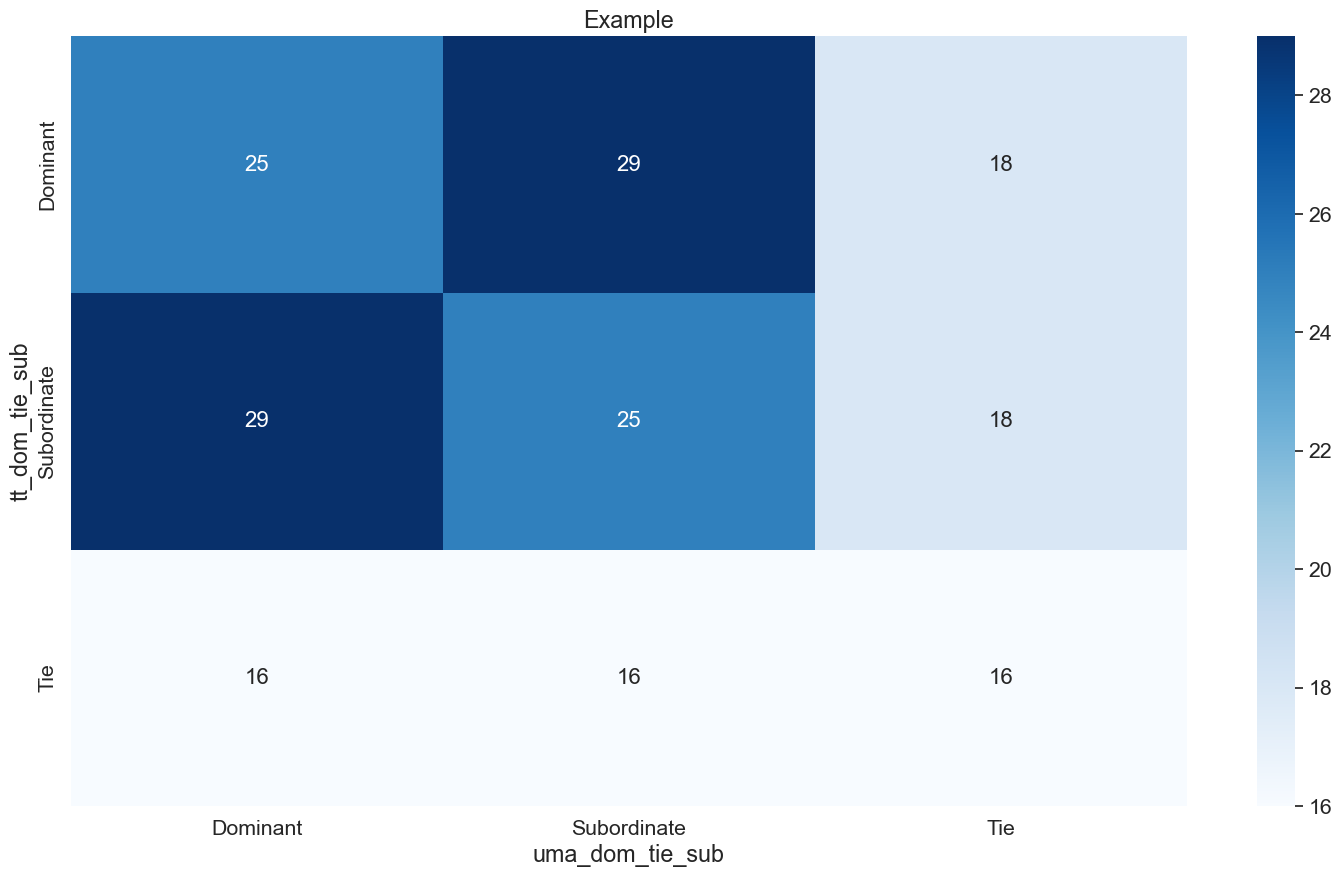

In [110]:
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(tt_and_uma_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
plt.title("Example")
plt.show()

In [111]:
dom_tie_sub_col = [col for col in exploded_pairwise_and_final_elo_score_df if "dom_tie_sub" in col]

In [112]:
dom_tie_sub_col

['uma_dom_tie_sub', 'hco_dom_tie_sub', 'tt_dom_tie_sub', 'rc_dom_tie_sub']

In [113]:
acronym_to_assay = {"tt": "Tube Test", "hco": "Home Cage", "uma": "Urine Marking", "rc": "Reward Competition"}

In [114]:
"abs" < "zyx"

True

In [115]:
from openpyxl import load_workbook

In [116]:
FilePath = "./proc/pair_wise_punnet_square.xlsx"

In [117]:
pair_wise_dominance_df_list = []
for assay_1, assay_2 in itertools.product(dom_tie_sub_col, dom_tie_sub_col):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]
    
    pair_wise_df = pd.DataFrame(exploded_pairwise_and_final_elo_score_df.groupby(["strain", assay_1, assay_2]).size()).reset_index()
    pair_wise_df = pair_wise_df.rename(columns={0: "{}_{}_count".format(acronym_1, acronym_2)})
    pair_wise_df = pair_wise_df.rename(columns={assay_1: "{}_with_{}".format(assay_1, acronym_2), assay_2: "{}_with_{}".format(assay_2, acronym_1)})
    pair_wise_dominance_df_list.append(pair_wise_df)

In [118]:
acronym_1

'rc'

Text(0.5, 0, 'Reward Competition')

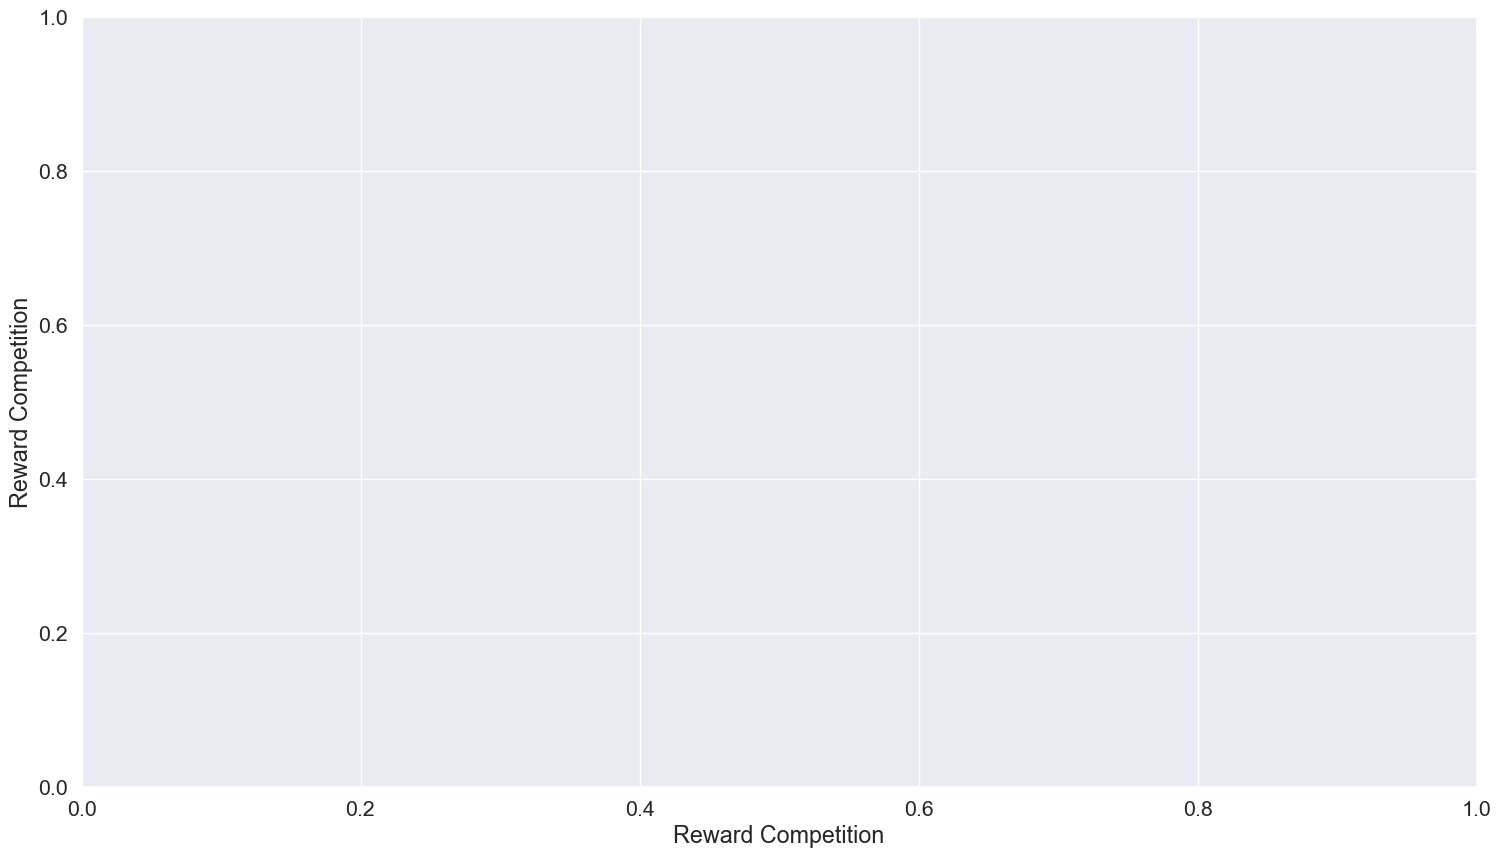

In [119]:
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1])
    plt.xlabel(acronym_to_assay[acronym_2])

In [120]:
pair_wise_dominance_df = pd.concat(pair_wise_dominance_df_list, axis = 1)

In [121]:
pair_wise_dominance_df = pair_wise_dominance_df.loc[:,~pair_wise_dominance_df.columns.duplicated()].copy()

In [122]:
pair_wise_dominance_df

,strain,hco_dom_tie_sub_with_uma,uma_dom_tie_sub_with_hco,hco_uma_count,tt_dom_tie_sub_with_uma,uma_dom_tie_sub_with_tt,tt_uma_count,rc_dom_tie_sub_with_uma,uma_dom_tie_sub_with_rc,rc_uma_count,hco_dom_tie_sub_with_tt,tt_dom_tie_sub_with_hco,hco_tt_count,hco_dom_tie_sub_with_rc,rc_dom_tie_sub_with_hco,hco_rc_count,rc_dom_tie_sub_with_tt,tt_dom_tie_sub_with_rc,rc_tt_count
0,C57,Dominant,Dominant,9,Dominant,Dominant,16,Dominant,Dominant,13,Dominant,Dominant,6.0,Dominant,Dominant,8,Dominant,Dominant,13
1,C57,Dominant,Subordinate,2,Dominant,Subordinate,9,Dominant,Subordinate,7,Dominant,Tie,6.0,Dominant,Subordinate,1,Dominant,Subordinate,8
2,C57,Dominant,Tie,1,Dominant,Tie,10,Dominant,Tie,8,Subordinate,Subordinate,6.0,Dominant,Tie,3,Dominant,Tie,7
3,C57,Subordinate,Dominant,2,Subordinate,Dominant,9,Subordinate,Dominant,7,Subordinate,Tie,6.0,Subordinate,Dominant,1,Subordinate,Dominant,8
4,C57,Subordinate,Subordinate,9,Subordinate,Subordinate,16,Subordinate,Subordinate,13,Tie,Dominant,17.0,Subordinate,Subordinate,8,Subordinate,Subordinate,13
5,C57,Subordinate,Tie,1,Subordinate,Tie,10,Subordinate,Tie,7,Tie,Subordinate,17.0,Subordinate,Tie,3,Subordinate,Tie,6
6,C57,Tie,Dominant,15,Tie,Dominant,8,Tie,Dominant,13,Tie,Tie,14.0,Tie,Dominant,14,Tie,Dominant,14
7,C57,Tie,Subordinate,15,Tie,Subordinate,8,Tie,Subordinate,13,Dominant,Dominant,7.0,Tie,Subordinate,13,Tie,Subordinate,14
8,C57,Tie,Tie,18,Tie,Tie,10,Tie,Tie,14,Dominant,Subordinate,12.0,Tie,Tie,20,Tie,Tie,12
9,CD1,Dominant,Dominant,12,Dominant,Dominant,9,Dominant,Dominant,18,Dominant,Tie,6.0,Dominant,Dominant,9,Dominant,Dominant,8


In [123]:
pair_wise_dominance_df.to_csv("./proc/pair_wise_punnet_square.csv")

## Reward Competition Winner vs Loser Disctribution

In [124]:
import matplotlib.colors as mcolors

hco_dom_tie_sub
uma_dom_tie_sub


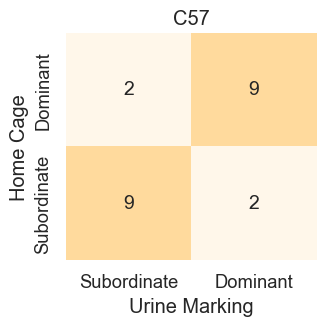

hco_dom_tie_sub
uma_dom_tie_sub


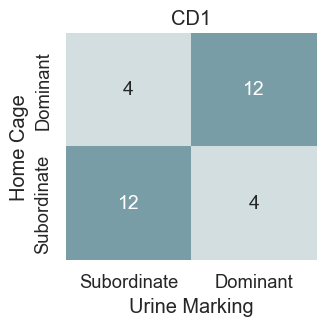

tt_dom_tie_sub
uma_dom_tie_sub


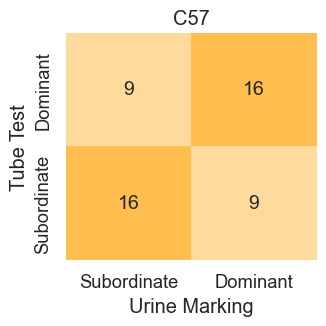

tt_dom_tie_sub
uma_dom_tie_sub


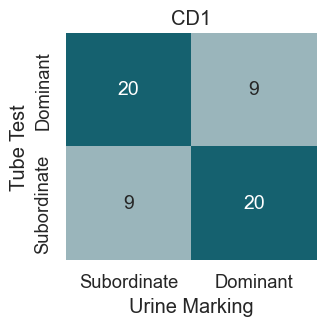

rc_dom_tie_sub
uma_dom_tie_sub


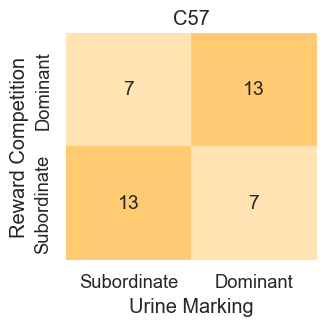

rc_dom_tie_sub
uma_dom_tie_sub


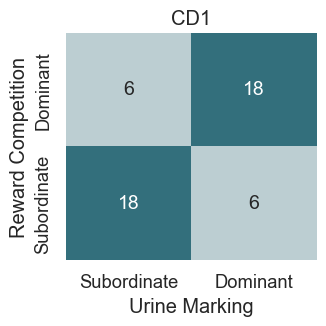

hco_dom_tie_sub
uma_dom_tie_sub


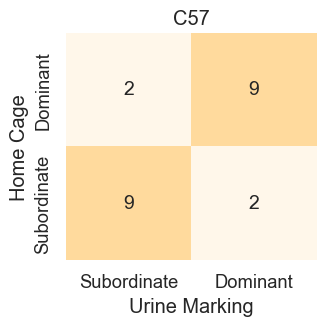

hco_dom_tie_sub
uma_dom_tie_sub


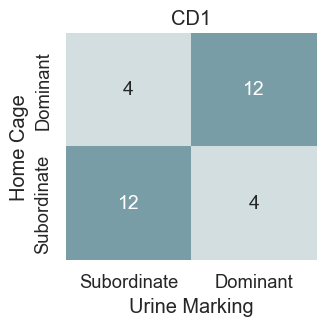

hco_dom_tie_sub
tt_dom_tie_sub


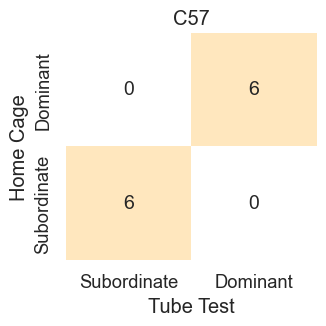

hco_dom_tie_sub
tt_dom_tie_sub


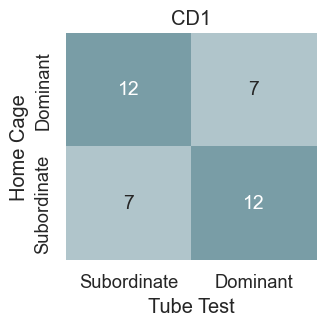

hco_dom_tie_sub
rc_dom_tie_sub


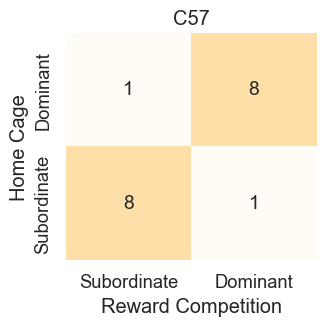

hco_dom_tie_sub
rc_dom_tie_sub


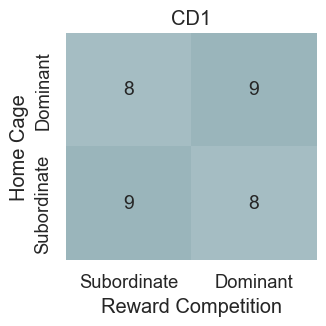

tt_dom_tie_sub
uma_dom_tie_sub


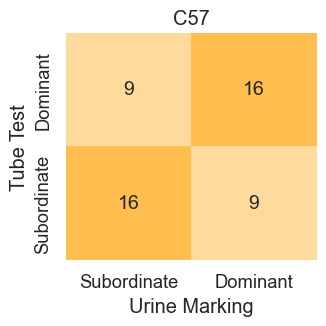

tt_dom_tie_sub
uma_dom_tie_sub


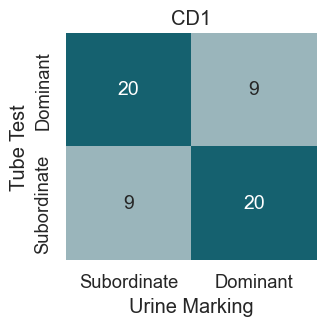

hco_dom_tie_sub
tt_dom_tie_sub


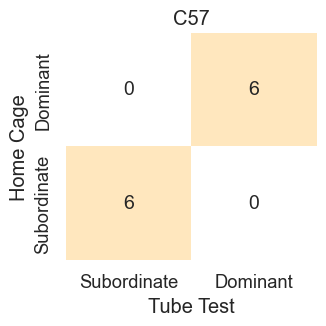

hco_dom_tie_sub
tt_dom_tie_sub


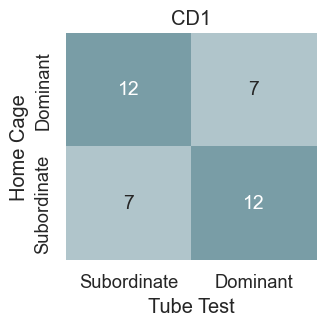

rc_dom_tie_sub
tt_dom_tie_sub


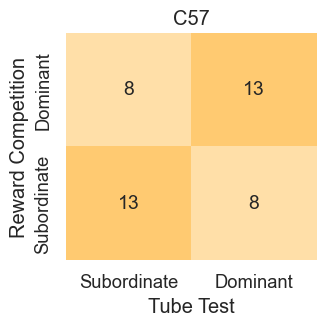

rc_dom_tie_sub
tt_dom_tie_sub


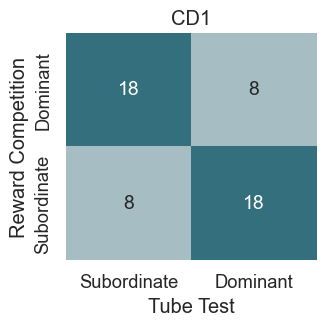

rc_dom_tie_sub
uma_dom_tie_sub


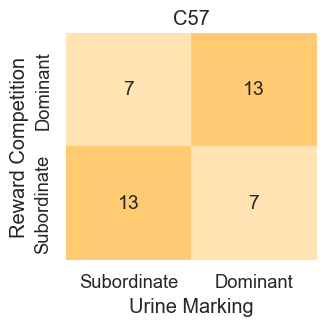

rc_dom_tie_sub
uma_dom_tie_sub


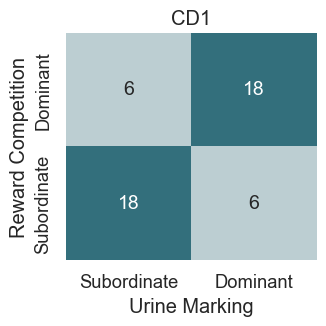

hco_dom_tie_sub
rc_dom_tie_sub


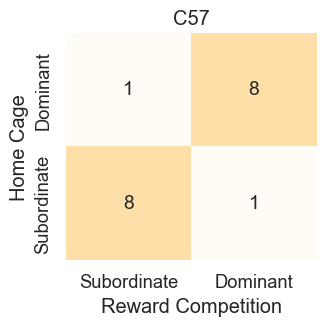

hco_dom_tie_sub
rc_dom_tie_sub


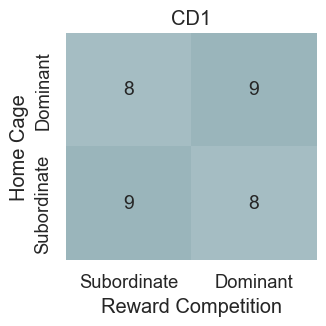

rc_dom_tie_sub
tt_dom_tie_sub


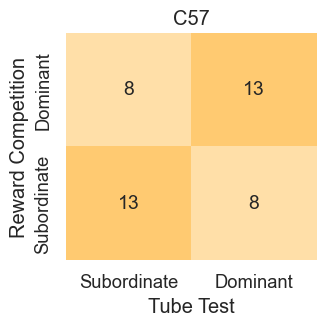

rc_dom_tie_sub
tt_dom_tie_sub


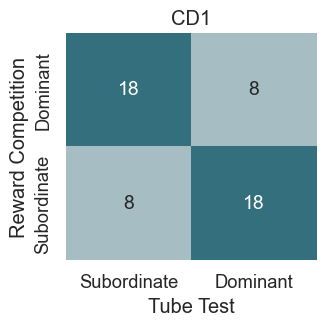

In [125]:
for assay_1, assay_2, strain in itertools.product(dom_tie_sub_col, dom_tie_sub_col, pairwise_and_final_elo_score_df["strain"].unique()):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    print(assay_1)
    print(assay_2)
    strain_df = exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["strain"] == strain]
    pair_assay_confusion = pd.crosstab(strain_df[assay_1], strain_df[assay_2])
    pair_assay_confusion = pair_assay_confusion[["Subordinate", "Dominant"]].loc[["Subordinate", "Dominant"]]
    pair_assay_confusion = pair_assay_confusion.reindex(["Dominant", "Subordinate"])

    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.2, font="Arial", rc={'figure.figsize':(3.5,3.5)}) # for label size
    if "CD1" == strain:
        color = mcolors.LinearSegmentedColormap.from_list("n", ["#ffffff", "#e6ecee", "#cddadd", "#b4c8cd", "#9bb6bc", "#83a4ac", "#6b939d", "#52828d", "#37717e", "#15616f"])

    elif "C57" == strain:
        color = mcolors.LinearSegmentedColormap.from_list("n", ["#ffffff", "#fff6e7", "#ffedce", "#ffe4b6", "#ffdb9e", "#ffd286", "#ffc96d", "#ffc053", "#ffb836", "#ffaf00"])

    sn.heatmap(pair_assay_confusion, annot=True, annot_kws={"size": 14}, cmap=color, vmin=0, vmax=20, cbar=False) # font size
#     plt.sort_index(level=0, ascending=True, inplace=True)
    plt.title("{}".format(strain))
#     plt.xlabel()
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1], )
    plt.xlabel(acronym_to_assay[acronym_2])
    plt.tight_layout() 
    plt.savefig("./proc/pairwise_plots/{}_{}_{}_pairwise_punnet.svg".format(strain, acronym_1, acronym_2))
    
    plt.show()

In [126]:
pair_assay_confusion

tt_dom_tie_sub,Subordinate,Dominant
rc_dom_tie_sub,,
Dominant,18,8
Subordinate,8,18


# Reward Competition Wins Based on Other Assay Ranks

In [127]:
all_reward_comp_file_paths = glob.glob("./pilot*/**/*reward_competition_all_competition*.csv", recursive=True)

In [128]:
all_reward_comp_file_paths

['./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/pilot_1_reward_competition_all_competition_cage_1_2_3_4_date_20220519_20220520.csv',
 './pilot_3/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_5_6_date_20221003_20221004/pilot_3_reward_competition_all_competition_cage_1_2_3_4_5_6_date_20221003_20221004.csv',
 './pilot_2/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_5_6_date_20220728_20220729/pilot_2_reward_competition_all_competition_cage_1_2_3_4_5_6_date_20220728_20220729.csv']

In [129]:
all_reward_comp_df = []
for file_path in all_reward_comp_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    all_reward_comp_df.append(per_experiment_df)

In [130]:
combined_reward_comp_df = pd.concat(all_reward_comp_df)
combined_reward_comp_df = combined_reward_comp_df.reset_index(drop=True)

In [131]:
combined_reward_comp_df["rc_averaged_loser"] = combined_reward_comp_df["rc_averaged_loser"].astype(str)
combined_reward_comp_df["rc_averaged_winner"] = combined_reward_comp_df["rc_averaged_winner"].astype(str)

In [132]:
combined_reward_comp_df.head()

,rc_animal_ids,rc_date,rc_winner,rc_loser,rc_winner_no_ties,rc_loser_no_ties,rc_different_result_as_previous,rc_number_of_switches,cohort,processed_cage_number,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",2022-05-19,"['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1....","['1.2', '1.2', '1.2', '1.2', '1.1', '1.1', '1....","['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1....","['1.2', '1.2', '1.2', '1.2', '1.1', '1.1', '1....","[False, False, False, True, False, True, True,...",8,pilot_1,1,...,1.2,11,9,0,20,2,0.550000,0.550000,True,0.000000
1,"('1.1', '1.2')",2022-05-20,"['1.1', 'tie', '1.2', 'tie', '1.2', 'tie', '1....","['1.2', 'tie', '1.1', 'tie', '1.1', 'tie', '1....","['1.1', '1.2', '1.2', '1.1', '1.1', '1.1', '1....","['1.2', '1.1', '1.1', '1.2', '1.2', '1.2', '1....","[True, False, True, False, False, True, False,...",4,pilot_1,1,...,1.2,5,4,10,19,1,0.555556,0.263158,True,0.526316
2,"('1.1', '1.3')",2022-05-19,"['1.3', 'tie', '1.3', '1.1', '1.1', '1.3', '1....","['1.1', 'tie', '1.1', '1.3', '1.3', '1.1', '1....","['1.3', '1.3', '1.1', '1.1', '1.3', '1.3', '1....","['1.1', '1.1', '1.3', '1.3', '1.1', '1.1', '1....","[False, True, False, True, False, False, True,...",6,pilot_1,1,...,1.1,13,4,2,19,9,0.764706,0.684211,False,0.105263
3,"('1.1', '1.3')",2022-05-20,"['1.1', 'tie', '1.3', '1.1', '1.1', '1.1', '1....","['1.3', 'tie', '1.1', '1.3', '1.3', '1.3', '1....","['1.1', '1.3', '1.1', '1.1', '1.1', '1.1', '1....","['1.3', '1.1', '1.3', '1.3', '1.3', '1.3', '1....","[True, True, False, False, False, False, False...",4,pilot_1,1,...,1.3,15,3,2,20,12,0.833333,0.750000,False,0.100000
4,"('1.1', '1.4')",2022-05-19,"['1.4', '1.1', '1.4', '1.4', '1.1', '1.4', '1....","['1.1', '1.4', '1.1', '1.1', '1.4', '1.1', '1....","['1.4', '1.1', '1.4', '1.4', '1.1', '1.4', '1....","['1.1', '1.4', '1.1', '1.1', '1.4', '1.1', '1....","[True, True, False, True, True, True, True, Fa...",9,pilot_1,1,...,1.1,13,7,0,20,6,0.650000,0.650000,False,0.000000


In [133]:
winner_merged_final_elo_score_df = merged_final_elo_score_df.copy()
loser_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [134]:
winner_merged_final_elo_score_df.columns = ["winner_{}".format(col) for col in winner_merged_final_elo_score_df.columns]
loser_merged_final_elo_score_df.columns = ["loser_{}".format(col) for col in loser_merged_final_elo_score_df.columns]

In [135]:
winner_merged_final_elo_score_df.head()

,winner_cage,winner_cohort,winner_home_cage_observation_final_elo_score,winner_home_cage_observation_rank,winner_reward_competition_final_elo_score,winner_reward_competition_rank,winner_strain,winner_subject_id,winner_tube_test_final_elo_score,winner_tube_test_rank,winner_urine_marking_final_elo_score,winner_urine_marking_rank
0,1,pilot_1,NaN,NaN,1165.8,1.0,C57,1.1,1062.2,2.0,1010.3,2.0
1,1,pilot_1,NaN,NaN,1007.3,2.0,C57,1.2,927.1,3.0,1000.8,3.0
2,1,pilot_1,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
3,1,pilot_1,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
4,2,pilot_1,NaN,NaN,1144.7,1.0,C57,2.1,1122.6,2.0,1037.4,1.0


In [136]:
winner_merged_final_elo_score_df.groupby(['winner_subject_id', "winner_cohort"]).count()

winner_cage  \
winner_subject_id winner_cohort                
1.1               pilot_1                  1   
                  pilot_2                  1   
                  pilot_3                  1   
1.2               pilot_1                  1   
                  pilot_2                  1   
...                                      ...   
6.2               pilot_3                  1   
6.3               pilot_2                  1   
                  pilot_3                  1   
6.4               pilot_2                  1   
                  pilot_3                  1   

                                 winner_home_cage_observation_final_elo_score  \
winner_subject_id winner_cohort                                                 
1.1               pilot_1                                                   0   
                  pilot_2                                                   1   
                  pilot_3                                                   1   
1.2               pilot_1                                                   0   
                  pilot_2                                                   1   
...                                                                       ...   
6.2               pilot_3                                                   1   
6.3               pilot_2                                                   1   
                  pilot_3                                                   1   
6.4               pilot_2                                                   1   
                  pilot_3                                                   1   

                                 winner_home_cage_observation_rank  \
winner_subject_id winner_cohort                                      
1.1               pilot_1                                        0   
                  pilot_2                                        1   
                  pilot_3                                        0   
1.2               pilot_1                                        0   
                  pilot_2                                        1   
...                                                            ...   
6.2               pilot_3                                        0   
6.3               pilot_2                                        1   
                  pilot_3                                        0   
6.4               pilot_2                                        1   
                  pilot_3                                        0   

                                 winner_reward_competition_final_elo_score  \
winner_subject_id winner_cohort                                              
1.1               pilot_1                                                1   
                  pilot_2                                                1   
                  pilot_3                                                1   
1.2               pilot_1                                                1   
                  pilot_2                                                1   
...                                                                    ...   
6.2               pilot_3                                                1   
6.3               pilot_2                                                1   
                  pilot_3                                                1   
6.4               pilot_2                                                1   
                  pilot_3                                                1   

                                 winner_reward_competition_rank  \
winner_subject_id winner_cohort                                   
1.1               pilot_1                                     1   
                  pilot_2                                     1   
                  pilot_3                                     1   
1.2               pilot_1                                     1   
                  pilot_2 

In [137]:
rc_all_competition_with_other_ranks_df = pd.merge(combined_reward_comp_df, winner_merged_final_elo_score_df,  how='left', left_on=['rc_averaged_winner','cohort'], right_on = ['winner_subject_id','winner_cohort'])
rc_all_competition_with_other_ranks_df = pd.merge(rc_all_competition_with_other_ranks_df, loser_merged_final_elo_score_df,  how='left', left_on=['rc_averaged_loser','cohort'], right_on = ['loser_subject_id','loser_cohort'])

In [138]:
rc_all_competition_with_other_ranks_df["rc_winner"] = rc_all_competition_with_other_ranks_df["rc_winner"].apply(lambda x: ast.literal_eval(x))
rc_all_competition_with_other_ranks_df["rc_loser"] = rc_all_competition_with_other_ranks_df["rc_loser"].apply(lambda x: ast.literal_eval(x))

In [139]:
rc_all_competition_with_other_ranks_df["list_of_animals"] = rc_all_competition_with_other_ranks_df["rc_animal_ids"].apply(lambda x: list(ast.literal_eval(x)))

In [140]:
rc_all_competition_with_other_ranks_df.tail()

,rc_animal_ids,rc_date,rc_winner,rc_loser,rc_winner_no_ties,rc_loser_no_ties,rc_different_result_as_previous,rc_number_of_switches,cohort,processed_cage_number,...,loser_home_cage_observation_rank,loser_reward_competition_final_elo_score,loser_reward_competition_rank,loser_strain,loser_subject_id,loser_tube_test_final_elo_score,loser_tube_test_rank,loser_urine_marking_final_elo_score,loser_urine_marking_rank,list_of_animals
186,"('6.2', '6.3')",2022-07-29,"[6.2, 6.3, 6.3, 6.3, 6.2, 6.3, 6.3, 6.2, 6.3, ...","[6.3, 6.2, 6.2, 6.2, 6.3, 6.2, 6.2, 6.3, 6.2, ...","['6.2', '6.3', '6.3', '6.3', '6.2', '6.3', '6....","['6.3', '6.2', '6.2', '6.2', '6.3', '6.2', '6....","[True, False, False, True, True, False, True, ...",9,pilot_2,6,...,3.0,948.4,3.0,CD1,6.2,1031.7,2.0,962.5,4.0,"[6.2, 6.3]"
187,"('6.2', '6.4')",2022-07-28,"[6.4, 6.4, 6.4, 6.4, 6.4, 6.4, tie, 6.2, tie, ...","[6.2, 6.2, 6.2, 6.2, 6.2, 6.2, tie, 6.4, tie, ...","['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....","['6.2', '6.2', '6.2', '6.2', '6.2', '6.2', '6....","[False, False, False, False, False, True, True...",2,pilot_2,6,...,3.0,948.4,3.0,CD1,6.2,1031.7,2.0,962.5,4.0,"[6.2, 6.4]"
188,"('6.2', '6.4')",2022-07-29,"[6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ...","['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....","['6.2', '6.2', '6.2', '6.2', '6.2', '6.2', '6....","[False, False, False, False, False, False, Fal...",0,pilot_2,6,...,3.0,948.4,3.0,CD1,6.2,1031.7,2.0,962.5,4.0,"[6.2, 6.4]"
189,"('6.3', '6.4')",2022-07-28,"[6.3, 6.4, 6.4, 6.3, 6.3, 6.4, 6.3, 6.3, 6.3, ...","[6.4, 6.3, 6.3, 6.4, 6.4, 6.3, 6.4, 6.4, 6.4, ...","['6.3', '6.4', '6.4', '6.3', '6.3', '6.4', '6....","['6.4', '6.3', '6.3', '6.4', '6.4', '6.3', '6....","[True, False, True, False, True, True, False, ...",9,pilot_2,6,...,2.0,911.2,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0,"[6.3, 6.4]"
190,"('6.3', '6.4')",2022-07-29,"[6.4, tie, 6.3, 6.3, tie, tie, 6.3, 6.3, 6.4, ...","[6.3, tie, 6.4, 6.4, tie, tie, 6.4, 6.4, 6.3, ...","['6.4', '6.3', '6.3', '6.3', '6.3', '6.4', '6....","['6.3', '6.4', '6.4', '6.4', '6.4', '6.3', '6....","[True, False, False, False, True, True, True, ...",7,pilot_2,6,...,2.0,911.2,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0,"[6.3, 6.4]"


In [141]:
hco_rank_1_4_for_reward_comf_df = rc_all_competition_with_other_ranks_df[(rc_all_competition_with_other_ranks_df["winner_home_cage_observation_rank"].isin([1, 4])) & (rc_all_competition_with_other_ranks_df["loser_home_cage_observation_rank"].isin([1, 4]))]

In [142]:
tt_rank_1_4_for_reward_comf_df = rc_all_competition_with_other_ranks_df[(rc_all_competition_with_other_ranks_df["winner_tube_test_rank"].isin([1, 4])) & (rc_all_competition_with_other_ranks_df["loser_tube_test_rank"].isin([1, 4]))]

In [143]:
hco_rank_1_4_for_reward_comf_df[["winner_home_cage_observation_rank", "loser_home_cage_observation_rank"]]

,winner_home_cage_observation_rank,loser_home_cage_observation_rank
24,1.0,4.0
43,1.0,4.0
44,1.0,4.0
63,1.0,4.0
64,1.0,4.0
85,4.0,1.0
86,1.0,4.0
97,4.0,1.0
98,4.0,1.0
119,4.0,1.0


In [144]:
cd1_rank_to_rc_wins = {}

In [145]:
cd1_rank_to_rc_wins["tt_rank_1_wins"] = []
cd1_rank_to_rc_wins["tt_rank_4_wins"] = []
for index, row in tt_rank_1_4_for_reward_comf_df[tt_rank_1_4_for_reward_comf_df["strain"] == "CD1"].iterrows():
    if row["winner_tube_test_rank"] == 1:
        cd1_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_loser_count"])

    else:
        cd1_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_loser_count"])


In [146]:
cd1_rank_to_rc_wins["hco_rank_1_wins"] = []
cd1_rank_to_rc_wins["hco_rank_4_wins"] = []
for index, row in hco_rank_1_4_for_reward_comf_df[hco_rank_1_4_for_reward_comf_df["strain"] == "CD1"].iterrows():
    if row["winner_home_cage_observation_rank"] == 1:
        cd1_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_loser_count"])

    else:
        cd1_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_loser_count"])


In [147]:
c57_rank_to_rc_wins = {}

In [148]:
c57_rank_to_rc_wins["tt_rank_1_wins"] = []
c57_rank_to_rc_wins["tt_rank_4_wins"] = []
for index, row in tt_rank_1_4_for_reward_comf_df[tt_rank_1_4_for_reward_comf_df["strain"] == "C57"].iterrows():
    if row["winner_tube_test_rank"] == 1:
        c57_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_loser_count"])

    else:
        c57_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_loser_count"])


In [149]:
c57_rank_to_rc_wins["hco_rank_1_wins"] = []
c57_rank_to_rc_wins["hco_rank_4_wins"] = []
for index, row in hco_rank_1_4_for_reward_comf_df[hco_rank_1_4_for_reward_comf_df["strain"] == "C57"].iterrows():
    if row["winner_home_cage_observation_rank"] == 1:
        c57_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_loser_count"])

    else:
        c57_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_loser_count"])


In [150]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (12,5)

[Text(1, 0, 'tt_rank_1_wins'),
 Text(2, 0, 'tt_rank_4_wins'),
 Text(3, 0, 'hco_rank_1_wins'),
 Text(4, 0, 'hco_rank_4_wins')]

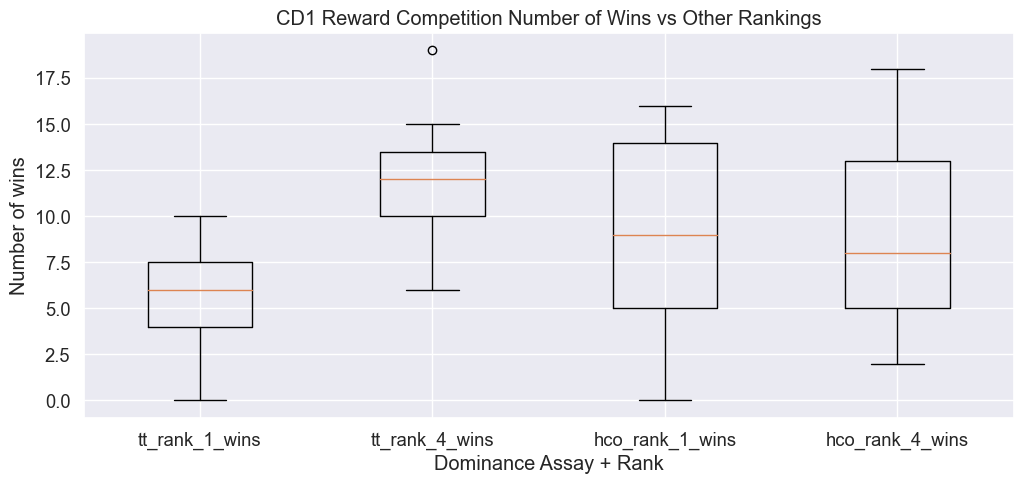

In [151]:
fig, ax = plt.subplots()
plt.title("CD1 Reward Competition Number of Wins vs Other Rankings")
plt.xlabel("Dominance Assay + Rank")
plt.ylabel("Number of wins")
ax.boxplot(cd1_rank_to_rc_wins.values())
ax.set_xticklabels(cd1_rank_to_rc_wins.keys())

[Text(1, 0, 'tt_rank_1_wins'),
 Text(2, 0, 'tt_rank_4_wins'),
 Text(3, 0, 'hco_rank_1_wins'),
 Text(4, 0, 'hco_rank_4_wins')]

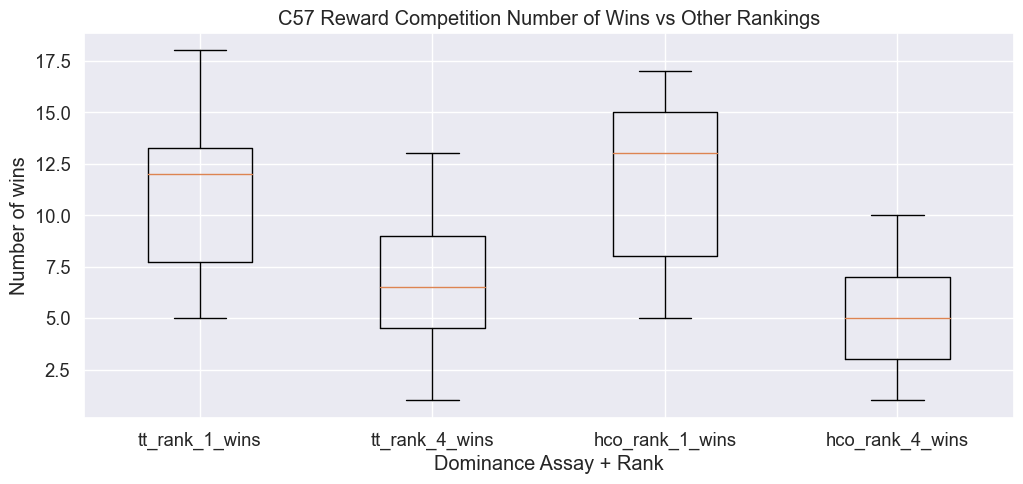

In [152]:
fig, ax = plt.subplots()
plt.title("C57 Reward Competition Number of Wins vs Other Rankings")
plt.xlabel("Dominance Assay + Rank")
plt.ylabel("Number of wins")
ax.boxplot(c57_rank_to_rc_wins.values())
ax.set_xticklabels(c57_rank_to_rc_wins.keys())

In [153]:
cd1_rank_to_rc_wins

{'tt_rank_1_wins': [6, 10, 7, 6, 0, 2, 6, 9, 4, 5, 9, 6, 4, 8, 4],
 'tt_rank_4_wins': [14, 9, 12, 11, 19, 15, 12, 9, 14, 12, 6, 13, 7, 11, 11],
 'hco_rank_1_wins': [14, 15, 15, 5, 14, 1, 0, 10, 6, 4, 6, 9, 16],
 'hco_rank_4_wins': [6, 4, 3, 14, 5, 18, 18, 5, 12, 8, 13, 8, 2]}

In [154]:
c57_rank_to_rc_wins

{'tt_rank_1_wins': [9, 11, 7, 13, 5, 6, 10, 15, 13, 13, 18, 16, 8, 5, 13, 14],
 'tt_rank_4_wins': [11, 8, 13, 6, 9, 9, 7, 3, 5, 6, 1, 3, 8, 13, 3, 5],
 'hco_rank_1_wins': [10, 15, 8, 5, 16, 17, 8, 13, 14],
 'hco_rank_4_wins': [7, 3, 10, 6, 2, 1, 8, 3, 5]}

In [155]:
pd.concat({k: pd.Series(v) for k, v in cd1_rank_to_rc_wins.items()}, axis=1).to_csv("./proc/cd1_rank_to_rc_wins")

In [156]:
pd.concat({k: pd.Series(v) for k, v in c57_rank_to_rc_wins.items()}, axis=1).to_csv("./proc/c57_rank_to_rc_wins")

# Looking at reward competition per day

In [157]:
rc_trial_as_column_paths = glob.glob("./**/*reward_competition_trial*.csv", recursive=True)

In [158]:
rc_trial_as_column_paths

['./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_1_reward_competition_trial_as_columns_cages_1_2_3_4_date_20220519_20220520.csv',
 './pilot_3/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_3_reward_competition_trial_as_columns_cages_1_2_3_4_5_6_date_20221003_20221004.csv',
 './pilot_2/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_2_reward_competition_trial_as_columns_cages_1_2_3_4_5_6_date_20220728_20220729.csv']

- Combining all the reward competition dataframes from each pilot

In [159]:
all_rc_trial_as_column_df = []
for file_path in rc_trial_as_column_paths:
    all_rc_trial_as_column_df.append(pd.read_csv(file_path, index_col=0))

In [160]:
combined_rc_trial_as_column_df = pd.concat(all_rc_trial_as_column_df)
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.reset_index(drop=True)
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.dropna(axis=1)
# Making this column into a tuple
combined_rc_trial_as_column_df["animal_ids"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: tuple(sorted(ast.literal_eval(x))))


- Creating a column for each animal ID so that we can merge based on the animal's ID

In [161]:
combined_rc_trial_as_column_df["first_animal_id"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: x[0])
combined_rc_trial_as_column_df["second_animal_id"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: x[1])

In [162]:
combined_rc_trial_as_column_df.head()

,date,cage,box,match,trial 1 winner,trial 2 winner,trial 3 winner,trial 4 winner,trial 5 winner,trial 6 winner,...,trial 15 winner,trial 16 winner,trial 17 winner,trial 18 winner,trial 19 winner,animal_ids,cohort,strain,first_animal_id,second_animal_id
0,2022-05-19,1,1.0,1.1 v 1.2,1.1,1.1,1.1,1.1,1.2,1.2,...,1.2,1.2,1.1,1.2,1.1,"(1.1, 1.2)",pilot_1,C57,1.1,1.2
1,2022-05-19,1,2.0,1.3 v 1.4,1.4,1.4,1.3,1.3,1.4,1.4,...,1.4,1.4,1.4,1.4,1.3,"(1.3, 1.4)",pilot_1,C57,1.3,1.4
2,2022-05-19,1,3.0,1.1 v 1.3,1.3,tie,1.3,1.1,1.1,1.3,...,1.3,1.3,1.3,1.3,1.3,"(1.1, 1.3)",pilot_1,C57,1.1,1.3
3,2022-05-19,1,4.0,1.2 v 1.4,1.4,1.2,1.2,1.2,1.4,1.4,...,1.4,1.2,1.2,1.4,1.4,"(1.2, 1.4)",pilot_1,C57,1.2,1.4
4,2022-05-19,1,2.0,1.2 v 1.3,1.2,1.3,1.3,1.3,1.2,1.3,...,1.2,1.2,1.3,1.2,1.2,"(1.2, 1.3)",pilot_1,C57,1.2,1.3


In [163]:
combined_rc_trial_as_column_df.columns

Index(['date', 'cage', 'box', 'match', 'trial 1 winner', 'trial 2 winner',
       'trial 3 winner', 'trial 4 winner', 'trial 5 winner', 'trial 6 winner',
       'trial 7 winner', 'trial 8 winner', 'trial 9 winner', 'trial 10 winner',
       'trial 11 winner', 'trial 12 winner', 'trial 13 winner',
       'trial 14 winner', 'trial 15 winner', 'trial 16 winner',
       'trial 17 winner', 'trial 18 winner', 'trial 19 winner', 'animal_ids',
       'cohort', 'strain', 'first_animal_id', 'second_animal_id'],
      dtype='object')

- Combining all trial columns into one for overall statistics

In [164]:
trial_columns = [col for col in combined_rc_trial_as_column_df.columns if "trial" in col]

In [165]:
trial_columns

['trial 1 winner',
 'trial 2 winner',
 'trial 3 winner',
 'trial 4 winner',
 'trial 5 winner',
 'trial 6 winner',
 'trial 7 winner',
 'trial 8 winner',
 'trial 9 winner',
 'trial 10 winner',
 'trial 11 winner',
 'trial 12 winner',
 'trial 13 winner',
 'trial 14 winner',
 'trial 15 winner',
 'trial 16 winner',
 'trial 17 winner',
 'trial 18 winner',
 'trial 19 winner']

- All the trials including ties

In [166]:
combined_rc_trial_as_column_df['all_trials_combined_with_ties'] = combined_rc_trial_as_column_df[trial_columns].apply(lambda x: list(x), axis=1)

- All the trials not including ties

In [167]:
combined_rc_trial_as_column_df['all_trials_combined_with_no_ties'] = combined_rc_trial_as_column_df.apply(lambda x: [trial for trial in x["all_trials_combined_with_ties"] if trial in x["animal_ids"]], axis=1)

- Making a column as 0 or 1 if the first/second animal wins tht round

In [168]:
combined_rc_trial_as_column_df["first_win_trials_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: [1 if x["first_animal_id"] == win else 0 for win in x['all_trials_combined_with_no_ties']], axis=1)
combined_rc_trial_as_column_df["second_win_trials_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: [1 if x["second_animal_id"] == win else 0 for win in x['all_trials_combined_with_no_ties']], axis=1)

In [169]:
combined_rc_trial_as_column_df.head()

,date,cage,box,match,trial 1 winner,trial 2 winner,trial 3 winner,trial 4 winner,trial 5 winner,trial 6 winner,...,trial 19 winner,animal_ids,cohort,strain,first_animal_id,second_animal_id,all_trials_combined_with_ties,all_trials_combined_with_no_ties,first_win_trials_no_ties,second_win_trials_no_ties
0,2022-05-19,1,1.0,1.1 v 1.2,1.1,1.1,1.1,1.1,1.2,1.2,...,1.1,"(1.1, 1.2)",pilot_1,C57,1.1,1.2,"[1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.1, 1.2, 1.1, ...","[1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.1, 1.2, 1.1, ...","[1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, ..."
1,2022-05-19,1,2.0,1.3 v 1.4,1.4,1.4,1.3,1.3,1.4,1.4,...,1.3,"(1.3, 1.4)",pilot_1,C57,1.3,1.4,"[1.4, 1.4, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.3, ...","[1.4, 1.4, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.3, ...","[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,2022-05-19,1,3.0,1.1 v 1.3,1.3,tie,1.3,1.1,1.1,1.3,...,1.3,"(1.1, 1.3)",pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...","[1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
3,2022-05-19,1,4.0,1.2 v 1.4,1.4,1.2,1.2,1.2,1.4,1.4,...,1.4,"(1.2, 1.4)",pilot_1,C57,1.2,1.4,"[1.4, 1.2, 1.2, 1.2, 1.4, 1.4, 1.2, 1.2, 1.4, ...","[1.4, 1.2, 1.2, 1.2, 1.4, 1.4, 1.2, 1.2, 1.4, ...","[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ..."
4,2022-05-19,1,2.0,1.2 v 1.3,1.2,1.3,1.3,1.3,1.2,1.3,...,1.2,"(1.2, 1.3)",pilot_1,C57,1.2,1.3,"[1.2, 1.3, 1.3, 1.3, 1.2, 1.3, 1.3, 1.3, 1.2, ...","[1.2, 1.3, 1.3, 1.3, 1.2, 1.3, 1.3, 1.3, 1.2, ...","[1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, ..."


- Counting the number of wins

In [170]:
combined_rc_trial_as_column_df["first_win_count"] = combined_rc_trial_as_column_df.apply(lambda x: sum(x["first_win_trials_no_ties"]), axis=1)
combined_rc_trial_as_column_df["second_win_count"] = combined_rc_trial_as_column_df.apply(lambda x: sum(x["second_win_trials_no_ties"]), axis=1)


- Counting the number of wins and losses(not including the ties)

In [171]:
combined_rc_trial_as_column_df["win_and_loss_count"] = combined_rc_trial_as_column_df.apply(lambda x: len(x["first_win_trials_no_ties"]), axis=1)


- Getting the proportions of wins vs wins + losses

In [172]:

combined_rc_trial_as_column_df["first_win_proportion_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: x["first_win_count"] / x["win_and_loss_count"], axis=1)
combined_rc_trial_as_column_df["second_win_proportion_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: x["second_win_count"] / x["win_and_loss_count"], axis=1)


- Classifying the mouse as dom/sub/tie based on if the winner has 60% or more

In [173]:
combined_rc_trial_as_column_df["first_dom_sub_or_tie"] = combined_rc_trial_as_column_df.apply(lambda x: "dom" if x["first_win_proportion_no_ties"] >= 0.6 else ("sub" if x["second_win_proportion_no_ties"] >= 0.6 else "tie"), axis=1)
combined_rc_trial_as_column_df["second_dom_sub_or_tie"] = combined_rc_trial_as_column_df.apply(lambda x: "dom" if x["second_win_proportion_no_ties"] >= 0.6 else ("sub" if x["first_win_proportion_no_ties"] >= 0.6 else "tie"), axis=1)

- Removing all the rows with ties for reward comp

In [174]:
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df[combined_rc_trial_as_column_df["first_dom_sub_or_tie"] != "tie"]

- Renaming to columns to numbers
    - Uncomment if using

- Splitting the rows into first and second subject

In [175]:
combined_rc_trial_as_column_df["animal_ids"]

2      (1.1, 1.3)
5      (1.1, 1.4)
6      (1.1, 1.4)
7      (1.2, 1.3)
8      (1.1, 1.3)
          ...    
185    (5.1, 5.2)
186    (6.1, 6.3)
187    (6.2, 6.4)
188    (6.1, 6.4)
190    (6.3, 6.4)
Name: animal_ids, Length: 144, dtype: object

In [176]:
combined_rc_trial_as_column_df["animal_ids_list"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: sorted(list(x)))

In [177]:
exploded_combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.explode("animal_ids")

In [178]:
exploded_combined_rc_trial_as_column_df = exploded_combined_rc_trial_as_column_df.rename(columns={"animal_ids": "subject_animal_id"})

In [179]:
exploded_combined_rc_trial_as_column_df["subject_index"] = exploded_combined_rc_trial_as_column_df.apply(lambda x: x["animal_ids_list"].index(x["subject_animal_id"]), axis=1)

In [180]:
exploded_combined_rc_trial_as_column_df["agent_index"] = exploded_combined_rc_trial_as_column_df["subject_index"].apply(lambda x: list(set([0, 1]) - set([x]))[0])

In [181]:
exploded_combined_rc_trial_as_column_df["agent_animal_id"] = exploded_combined_rc_trial_as_column_df.apply(lambda x: x["animal_ids_list"][x["agent_index"]], axis=1)

In [182]:
exploded_combined_rc_trial_as_column_df[["subject_index", "subject_animal_id", "animal_ids_list", "agent_index", "agent_animal_id"]].head()

,subject_index,subject_animal_id,animal_ids_list,agent_index,agent_animal_id
2,0,1.1,"[1.1, 1.3]",1,1.3
2,1,1.3,"[1.1, 1.3]",0,1.1
5,0,1.1,"[1.1, 1.4]",1,1.4
5,1,1.4,"[1.1, 1.4]",0,1.1
6,0,1.1,"[1.1, 1.4]",1,1.4


- Merging the ranking dataframe based on the first and second animal ID + cohort

In [183]:
subject_merged_final_elo_score_df = merged_final_elo_score_df.copy()
agent_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [184]:
subject_merged_final_elo_score_df.columns = ["subject_{}".format(col) for col in subject_merged_final_elo_score_df.columns]
agent_merged_final_elo_score_df.columns = ["agent_{}".format(col) for col in agent_merged_final_elo_score_df.columns]

In [185]:
combined_rc_trial_as_column_with_other_ranks_df = pd.merge(exploded_combined_rc_trial_as_column_df, subject_merged_final_elo_score_df,  how='left', left_on=['subject_animal_id','cohort'], right_on = ['subject_subject_id','subject_cohort'])
combined_rc_trial_as_column_with_other_ranks_df = pd.merge(combined_rc_trial_as_column_with_other_ranks_df, agent_merged_final_elo_score_df,  how='left', left_on=['agent_animal_id','cohort'], right_on = ['agent_subject_id','agent_cohort'])


In [186]:
combined_rc_trial_as_column_with_other_ranks_df

,date,cage,box,match,trial 1 winner,trial 2 winner,trial 3 winner,trial 4 winner,trial 5 winner,trial 6 winner,...,agent_home_cage_observation_final_elo_score,agent_home_cage_observation_rank,agent_reward_competition_final_elo_score,agent_reward_competition_rank,agent_strain,agent_subject_id,agent_tube_test_final_elo_score,agent_tube_test_rank,agent_urine_marking_final_elo_score,agent_urine_marking_rank
0,2022-05-19,1,3.0,1.1 v 1.3,1.3,tie,1.3,1.1,1.1,1.3,...,NaN,NaN,900.9,4.0,C57,1.3,775.7,4.0,972.0,4.0
1,2022-05-19,1,3.0,1.1 v 1.3,1.3,tie,1.3,1.1,1.1,1.3,...,NaN,NaN,1165.8,1.0,C57,1.1,1062.2,2.0,1010.3,2.0
2,2022-05-19,1,1.0,1.1 v 1.4,1.4,1.1,1.4,1.4,1.1,1.4,...,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
3,2022-05-19,1,1.0,1.1 v 1.4,1.4,1.1,1.4,1.4,1.1,1.4,...,NaN,NaN,1165.8,1.0,C57,1.1,1062.2,2.0,1010.3,2.0
4,2022-05-20,1,4.0,1.1 v 1.4,1.1,1.1,1.1,1.1,1.1,1.1,...,NaN,NaN,926.0,3.0,C57,1.4,1235.0,1.0,1016.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2022-07-29,6,2.0,6.2v6.4,6.4,6.4,6.4,6.4,6.4,6.4,...,779.7,3.0,948.4,3.0,CD1,6.2,1031.7,2.0,962.5,4.0
284,2022-07-29,6,3.0,6.1v6.4,6.1,6.1,6.1,6.4,tie,6.1,...,1080.4,2.0,911.2,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0
285,2022-07-29,6,3.0,6.1v6.4,6.1,6.1,6.1,6.4,tie,6.1,...,1425.3,1.0,1117.1,1.0,CD1,6.1,943.6,3.0,1027.0,1.0
286,2022-07-29,6,1.0,6.3v6.4,6.4,tie,6.3,6.3,tie,tie,...,1080.4,2.0,911.2,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0


- "Melting" the dataframe so that each trial column is its own row. The trial number has its own column
    - This will help us plot by plotting the trial number on x and the proportion of wins on y

In [187]:
columns_to_keep = [col for col in combined_rc_trial_as_column_with_other_ranks_df.columns if "winner" not in col]

In [188]:
columns_to_keep

['date',
 'cage',
 'box',
 'match',
 'subject_animal_id',
 'cohort',
 'strain',
 'first_animal_id',
 'second_animal_id',
 'all_trials_combined_with_ties',
 'all_trials_combined_with_no_ties',
 'first_win_trials_no_ties',
 'second_win_trials_no_ties',
 'first_win_count',
 'second_win_count',
 'win_and_loss_count',
 'first_win_proportion_no_ties',
 'second_win_proportion_no_ties',
 'first_dom_sub_or_tie',
 'second_dom_sub_or_tie',
 'animal_ids_list',
 'subject_index',
 'agent_index',
 'agent_animal_id',
 'subject_cage',
 'subject_cohort',
 'subject_home_cage_observation_final_elo_score',
 'subject_home_cage_observation_rank',
 'subject_reward_competition_final_elo_score',
 'subject_reward_competition_rank',
 'subject_strain',
 'subject_subject_id',
 'subject_tube_test_final_elo_score',
 'subject_tube_test_rank',
 'subject_urine_marking_final_elo_score',
 'subject_urine_marking_rank',
 'agent_cage',
 'agent_cohort',
 'agent_home_cage_observation_final_elo_score',
 'agent_home_cage_observa

In [189]:
melted_rc_trial_as_column_df = combined_rc_trial_as_column_with_other_ranks_df.melt(id_vars=columns_to_keep, 
        var_name="trial_number", 
        value_name="trial_winner")

- Turning the trial number from a string into a integer so that it can plotted

In [190]:
melted_rc_trial_as_column_df["trial_number"] = melted_rc_trial_as_column_df["trial_number"].apply(lambda x: [int(s) for s in re.findall(r'\b\d+\b', x)][0])

In [191]:
melted_rc_trial_as_column_df.iloc[:, :15].head()

,date,cage,box,match,subject_animal_id,cohort,strain,first_animal_id,second_animal_id,all_trials_combined_with_ties,all_trials_combined_with_no_ties,first_win_trials_no_ties,second_win_trials_no_ties,first_win_count,second_win_count
0,2022-05-19,1,3.0,1.1 v 1.3,1.1,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...","[1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...",4,13
1,2022-05-19,1,3.0,1.1 v 1.3,1.3,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...","[1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...",4,13
2,2022-05-19,1,1.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...","[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...",6,13
3,2022-05-19,1,1.0,1.1 v 1.4,1.4,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...","[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...",6,13
4,2022-05-20,1,4.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...","[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",16,2


In [192]:
melted_rc_trial_as_column_df.iloc[:, -5:].head()

,agent_tube_test_rank,agent_urine_marking_final_elo_score,agent_urine_marking_rank,trial_number,trial_winner
0,4.0,972.0,4.0,1,1.3
1,2.0,1010.3,2.0,1,1.3
2,1.0,1016.9,1.0,1,1.4
3,2.0,1010.3,2.0,1,1.4
4,1.0,1016.9,1.0,1,1.1


In [193]:
melted_rc_trial_as_column_df["subject_is_winner"] = melted_rc_trial_as_column_df.apply(lambda x: 1 if x["subject_animal_id"] == x["trial_winner"] else 0, axis=1)

In [194]:
melted_rc_trial_as_column_df

,date,cage,box,match,subject_animal_id,cohort,strain,first_animal_id,second_animal_id,all_trials_combined_with_ties,...,agent_reward_competition_rank,agent_strain,agent_subject_id,agent_tube_test_final_elo_score,agent_tube_test_rank,agent_urine_marking_final_elo_score,agent_urine_marking_rank,trial_number,trial_winner,subject_is_winner
0,2022-05-19,1,3.0,1.1 v 1.3,1.1,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...",...,4.0,C57,1.3,775.7,4.0,972.0,4.0,1,1.3,0
1,2022-05-19,1,3.0,1.1 v 1.3,1.3,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...",...,1.0,C57,1.1,1062.2,2.0,1010.3,2.0,1,1.3,1
2,2022-05-19,1,1.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...",...,3.0,C57,1.4,1235.0,1.0,1016.9,1.0,1,1.4,0
3,2022-05-19,1,1.0,1.1 v 1.4,1.4,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...",...,1.0,C57,1.1,1062.2,2.0,1010.3,2.0,1,1.4,1
4,2022-05-20,1,4.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...",...,3.0,C57,1.4,1235.0,1.0,1016.9,1.0,1,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,2022-07-29,6,2.0,6.2v6.4,6.4,pilot_2,CD1,6.2,6.4,"[6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...",...,3.0,CD1,6.2,1031.7,2.0,962.5,4.0,19,6.4,1
5468,2022-07-29,6,3.0,6.1v6.4,6.1,pilot_2,CD1,6.1,6.4,"[6.1, 6.1, 6.1, 6.4, tie, 6.1, 6.1, 6.1, 6.1, ...",...,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0,19,6.1,1
5469,2022-07-29,6,3.0,6.1v6.4,6.4,pilot_2,CD1,6.1,6.4,"[6.1, 6.1, 6.1, 6.4, tie, 6.1, 6.1, 6.1, 6.1, ...",...,1.0,CD1,6.1,943.6,3.0,1027.0,1.0,19,6.1,0
5470,2022-07-29,6,1.0,6.3v6.4,6.3,pilot_2,CD1,6.3,6.4,"[6.4, tie, 6.3, 6.3, tie, tie, 6.3, 6.3, 6.4, ...",...,4.0,CD1,6.4,1114.1,1.0,1000.8,3.0,19,6.3,1


In [195]:
melted_rc_trial_as_column_df["subject_dom_sub_or_tie"] = melted_rc_trial_as_column_df.apply(lambda x: x["first_dom_sub_or_tie"] if x["subject_index"] == 0 else (x["second_dom_sub_or_tie"] if x["subject_index"] == 1 else np.nan), axis=1) 

In [196]:
melted_rc_trial_as_column_df

,date,cage,box,match,subject_animal_id,cohort,strain,first_animal_id,second_animal_id,all_trials_combined_with_ties,...,agent_strain,agent_subject_id,agent_tube_test_final_elo_score,agent_tube_test_rank,agent_urine_marking_final_elo_score,agent_urine_marking_rank,trial_number,trial_winner,subject_is_winner,subject_dom_sub_or_tie
0,2022-05-19,1,3.0,1.1 v 1.3,1.1,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...",...,C57,1.3,775.7,4.0,972.0,4.0,1,1.3,0,sub
1,2022-05-19,1,3.0,1.1 v 1.3,1.3,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...",...,C57,1.1,1062.2,2.0,1010.3,2.0,1,1.3,1,dom
2,2022-05-19,1,1.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...",...,C57,1.4,1235.0,1.0,1016.9,1.0,1,1.4,0,sub
3,2022-05-19,1,1.0,1.1 v 1.4,1.4,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...",...,C57,1.1,1062.2,2.0,1010.3,2.0,1,1.4,1,dom
4,2022-05-20,1,4.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...",...,C57,1.4,1235.0,1.0,1016.9,1.0,1,1.1,1,dom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,2022-07-29,6,2.0,6.2v6.4,6.4,pilot_2,CD1,6.2,6.4,"[6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...",...,CD1,6.2,1031.7,2.0,962.5,4.0,19,6.4,1,dom
5468,2022-07-29,6,3.0,6.1v6.4,6.1,pilot_2,CD1,6.1,6.4,"[6.1, 6.1, 6.1, 6.4, tie, 6.1, 6.1, 6.1, 6.1, ...",...,CD1,6.4,1114.1,1.0,1000.8,3.0,19,6.1,1,dom
5469,2022-07-29,6,3.0,6.1v6.4,6.4,pilot_2,CD1,6.1,6.4,"[6.1, 6.1, 6.1, 6.4, tie, 6.1, 6.1, 6.1, 6.1, ...",...,CD1,6.1,943.6,3.0,1027.0,1.0,19,6.1,0,sub
5470,2022-07-29,6,1.0,6.3v6.4,6.3,pilot_2,CD1,6.3,6.4,"[6.4, tie, 6.3, 6.3, tie, tie, 6.3, 6.3, 6.4, ...",...,CD1,6.4,1114.1,1.0,1000.8,3.0,19,6.3,1,dom


In [197]:
melted_rc_trial_as_column_df["subject_animal_id"]

0       1.1
1       1.3
2       1.1
3       1.4
4       1.1
       ... 
5467    6.4
5468    6.1
5469    6.4
5470    6.3
5471    6.4
Name: subject_animal_id, Length: 5472, dtype: object

- Getting all the rows that only have rank 1 vs 4 for a given assay

In [198]:
assay_to_rank_1_4_df = defaultdict(dict)

In [199]:
assay_to_rank_1_4_df["subject_home_cage_observation_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_home_cage_observation_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_home_cage_observation_rank"].isin([1, 4]))]
assay_to_rank_1_4_df["subject_tube_test_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_tube_test_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_tube_test_rank"].isin([1, 4]))]
assay_to_rank_1_4_df["subject_urine_marking_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_urine_marking_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_urine_marking_rank"].isin([1, 4]))]

- Getting the mean, standard error, and count for each assay

In [200]:
for key, item in assay_to_rank_1_4_df.items():
    assay_to_rank_1_4_df[key]["mean_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).mean().reset_index()
    assay_to_rank_1_4_df[key]["sem_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).sem().reset_index()
    assay_to_rank_1_4_df[key]["count_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).count().reset_index()


/tmp/ipykernel_2286502/2275308943.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  assay_to_rank_1_4_df[key]["mean_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).mean().reset_index()
/tmp/ipykernel_2286502/2275308943.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  assay_to_rank_1_4_df[key]["sem_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).sem().reset_index()
/tmp/ipykernel_2286502/2275308943.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will d

- Plotting without seperating winners

In [201]:
from matplotlib.transforms import Affine2D

In [202]:
import string

1.0
4.0


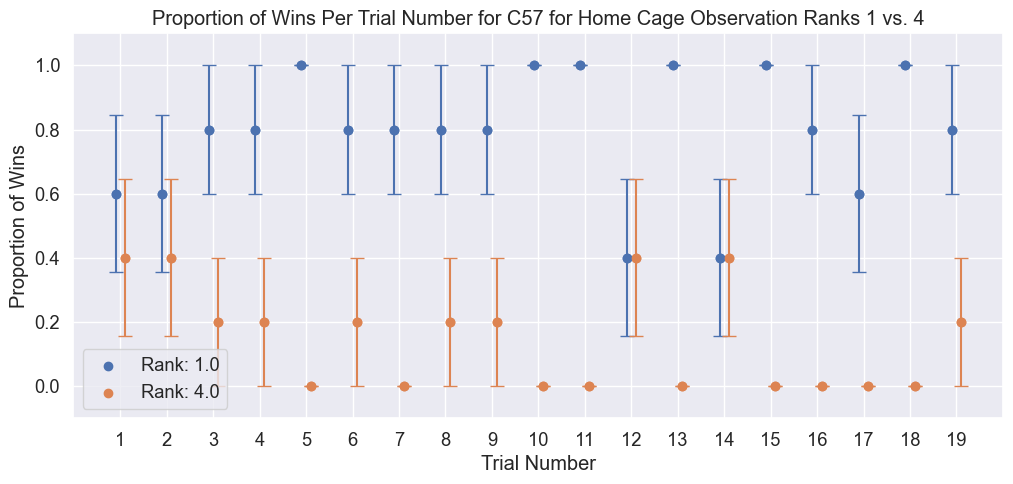

1.0
4.0


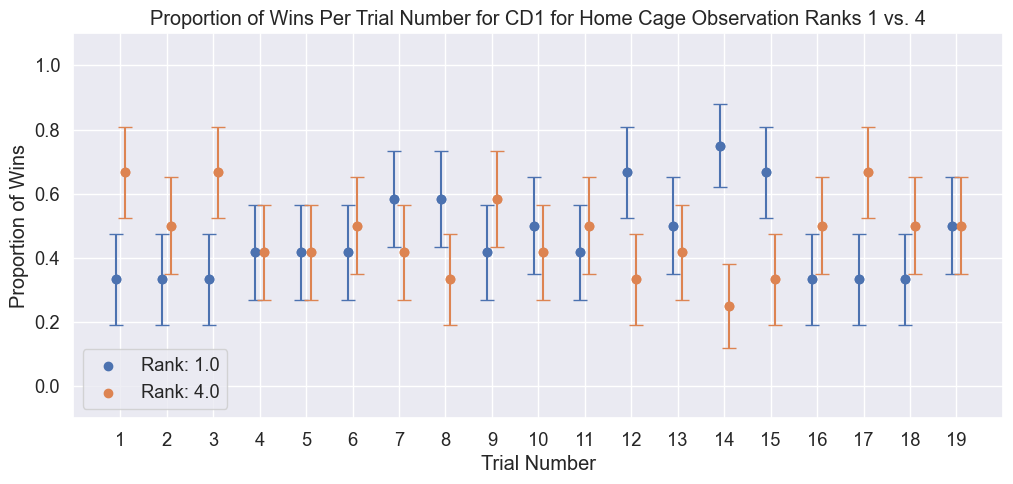

1.0
4.0


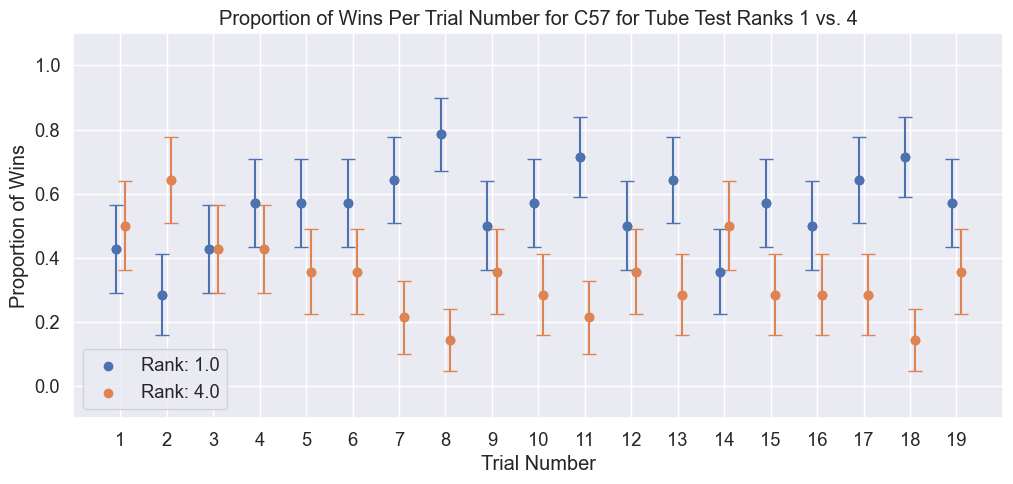

1.0
4.0


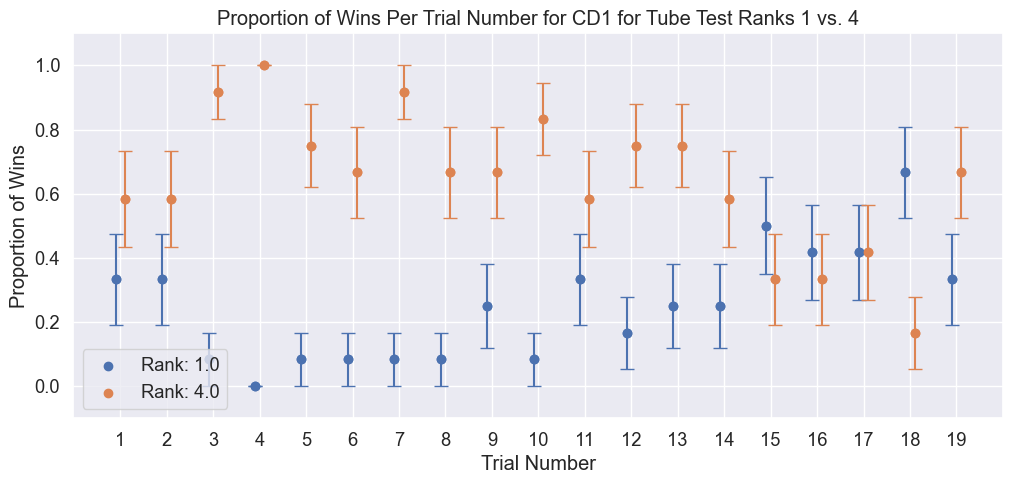

1.0
4.0


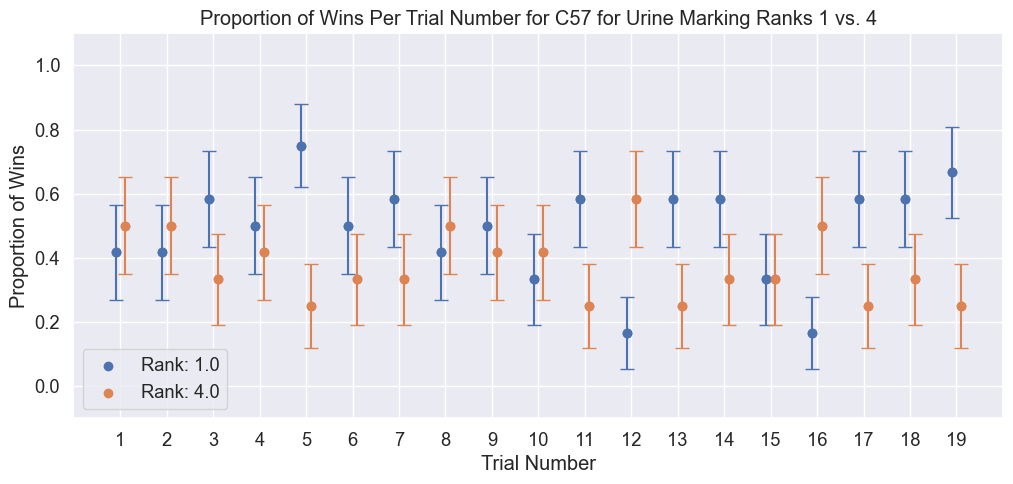

1.0
4.0


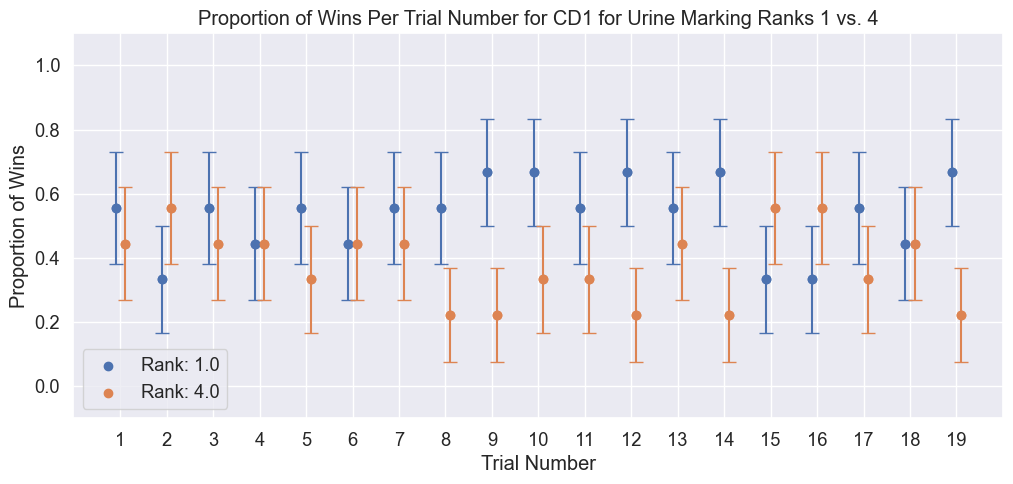

In [203]:
for key, item in assay_to_rank_1_4_df.items():
    for strain in assay_to_rank_1_4_df[key]["mean_df"]["strain"].unique():
        fig, ax = plt.subplots()
        # Transformations so that points can be differentiated on the same trial number
        trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
        trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
        transformation_list = [trans1, trans2]
        # Getting the rows for the current strain
        strain_mask = assay_to_rank_1_4_df[key]["mean_df"]["strain"] == strain
        strain_mean = assay_to_rank_1_4_df[key]["mean_df"][strain_mask]
        strain_sem = assay_to_rank_1_4_df[key]["sem_df"][strain_mask]
        strain_count = assay_to_rank_1_4_df[key]["count_df"][strain_mask]
        
        for rank in strain_mean[key].unique():
            print(rank)
            rank_index = list(strain_mean[key].unique()).index(rank)
            rank_mask = (strain_mean[key] == rank)
            rank_mean = strain_mean[rank_mask]
            rank_sem = strain_sem[rank_mask]
            rank_count = strain_count[rank_mask]
            plt.scatter(rank_mean["trial_number"], y=rank_mean["subject_is_winner"], label="Rank: {}".format(rank), transform=transformation_list[rank_index])
            plt.errorbar(rank_mean["trial_number"], rank_mean["subject_is_winner"], \
                         yerr=rank_sem["subject_is_winner"], fmt='o', transform=transformation_list[rank_index],\
                        capsize=5)

#         ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.legend(loc='lower left')

        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        plt.xlabel("Trial Number")
        plt.ylabel("Proportion of Wins")
        assay_name_with_spaces = string.capwords(" ".join(key.split("_")[1:-1]))
        plt.title("Proportion of Wins Per Trial Number for {} for {} Ranks 1 vs. 4".format(strain, assay_name_with_spaces))
        plt.ylim((-0.1,1.1))
        plt.xticks(np.arange(assay_to_rank_1_4_df[key]["base_df"]["trial_number"].min(), assay_to_rank_1_4_df[key]["base_df"]["trial_number"].max()+1, 1.0))
        assay_name_with_underscore = "_".join(key.split("_")[1:-1])
        plt.savefig("./proc/reward_competition_plots/{}_reward_competition_per_trial_proportion_for_{}.svg".format(strain, assay_name_with_underscore))
        plt.show()

- Plotting with seperating the winners

In [204]:
from itertools import product

## Competition

## Percent Stable and percent unstable

# Urine Marking Assay

In [205]:
urine_marking_file_paths = glob.glob("./pilot_*/data/*Urine*.xlsx", recursive=True)

In [206]:
urine_marking_file_paths

['./pilot_1/data/iwata_Urine_Marking_Assay_Data.xlsx',
 './pilot_3/data/iwata_Urine_Marking_Assay_Data.xlsx',
 './pilot_2/data/iwata_Urine_Marking_Assay_Data.xlsx']

In [207]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_excel(file_path))

In [208]:
all_urine_marking_df[0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Date,CAGE,Match,Winner
3,NaN,2022-05-18 00:00:00,3,4.1 (1) v 3.2 (2),3.2 (2)
4,NaN,2022-05-18 00:00:00,3,4.2 (3) v 3.3 (4),4.2 (3)
5,NaN,2022-05-18 00:00:00,4,3.1 (1) v 3.4 (2),3.1 (1)
6,NaN,2022-05-18 00:00:00,4,4.3 (3) v 4.4 (4),4.4 (4)
7,NaN,2022-05-19 00:00:00,3,4.1 (1) v 3.2 (2),4.1 (1)
8,NaN,2022-05-19 00:00:00,3,4.2 (3) v 3.3 (4),tie
9,NaN,2022-05-19 00:00:00,4,3.1 (1) v 3.4 (2),3.4 (2)


In [209]:
raise ValueError("")

ValueError: 

## Urine Marking Assay

In [ ]:
urine_marking_file_paths = glob.glob("./**/*urine_marking_elo_score_history*.csv", recursive=True)

In [ ]:
urine_marking_file_paths

In [ ]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_csv(file_path, index_col=0))

In [ ]:
combined_urine_marking_df = pd.concat(all_urine_marking_df)
combined_urine_marking_df = combined_urine_marking_df.reset_index(drop=True)

In [ ]:
combined_urine_marking_df = combined_urine_marking_df.reset_index()

# TODO: OVERE HERE

In [ ]:
combined_urine_marking_df

- For even rows, the left pee spots correspond to the subject's pee spots

In [ ]:
even_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 == 0].copy()

In [ ]:
even_urine_marking_df.columns

In [ ]:
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_id": "left_subject_id"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_ranking": "left_ranking"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"updated_elo_score": "left_elo_score"})
even_urine_marking_df = even_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "right_number_of_spots", "original_elo_score"])
even_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(even_urine_marking_df)))

In [ ]:
odd_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 != 0].copy()

In [ ]:
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_id": "right_subject_id"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_ranking": "right_ranking"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"updated_elo_score": "right_elo_score"})
odd_urine_marking_df = odd_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "left_number_of_spots", "original_elo_score"])
odd_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(odd_urine_marking_df)))

In [ ]:
even_urine_marking_df.head()

In [ ]:
odd_urine_marking_df.head()

In [ ]:
cols_to_use = list(odd_urine_marking_df.columns.difference(even_urine_marking_df.columns))
cols_to_use.append("matching_index")

In [ ]:
cols_to_use

In [ ]:
urine_marking_left_right = pd.merge(even_urine_marking_df, odd_urine_marking_df[cols_to_use], left_on=["matching_index"], right_on=["matching_index"], how='outer')

In [ ]:
urine_marking_left_right

In [ ]:
sorted(urine_marking_left_right.columns)

In [ ]:
sorted_columns = ['experiment_type',
 'cohort',
 'cage',
 'processed_cage_number',
 'strain',
 'date',
 'match',
 'winner',
 'loser',
 'ties',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'total_match_number',
 'win_draw_loss',
 ]

In [ ]:
urine_marking_left_right = urine_marking_left_right[sorted_columns]

In [ ]:
urine_marking_left_right.head()

In [ ]:
urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)

In [ ]:
merged_final_elo_score_df["subject_id"] = merged_final_elo_score_df["subject_id"].astype(str)

In [ ]:
left_merged_final_elo_score_df = merged_final_elo_score_df

In [ ]:
left_subject_column_renaming = {}
for col in left_merged_final_elo_score_df.columns:
    left_subject_column_renaming[col] = "left_" + col

In [ ]:
left_merged_final_elo_score_df = left_merged_final_elo_score_df.rename(columns=left_subject_column_renaming)

In [ ]:
right_merged_final_elo_score_df = merged_final_elo_score_df

In [ ]:
right_subject_column_renaming = {}
for col in right_merged_final_elo_score_df.columns:
    right_subject_column_renaming[col] = "right_" + col

In [ ]:
right_merged_final_elo_score_df = right_merged_final_elo_score_df.rename(columns=right_subject_column_renaming)

In [ ]:
cols_to_use = list(urine_marking_left_right.columns.difference(left_merged_final_elo_score_df.columns))
# cols_to_use.append("cohort")
cols_to_use.append("left_subject_id")

In [ ]:
cols_to_use


In [ ]:
urine_and_elo_score_df = pd.merge(urine_marking_left_right[cols_to_use], left_merged_final_elo_score_df, left_on=["left_subject_id", "cohort"], right_on=["left_subject_id", "left_cohort"], how='inner')

In [ ]:
cols_to_use = list(urine_and_elo_score_df.columns.difference(right_merged_final_elo_score_df.columns))
cols_to_use.append("right_subject_id")

In [ ]:
urine_and_elo_score_df = pd.merge(urine_and_elo_score_df[cols_to_use], right_merged_final_elo_score_df, left_on=["right_subject_id", "cohort"], right_on=["right_subject_id", "right_cohort"], how='inner')

In [ ]:
urine_and_elo_score_df["pee_spot_difference"] = urine_and_elo_score_df["left_number_of_spots"] - urine_and_elo_score_df["right_number_of_spots"]
urine_and_elo_score_df["tube_test_elo_score_difference"] = urine_and_elo_score_df["left_tube_test_final_elo_score"] - urine_and_elo_score_df["right_tube_test_final_elo_score"]
urine_and_elo_score_df["home_cage_observation_elo_score_difference"] = urine_and_elo_score_df["left_home_cage_observation_final_elo_score"] - urine_and_elo_score_df["right_home_cage_observation_final_elo_score"]
urine_and_elo_score_df["reward_competition_elo_score_difference"] = urine_and_elo_score_df["left_reward_competition_final_elo_score"] - urine_and_elo_score_df["right_reward_competition_final_elo_score"]

urine_and_elo_score_df["tube_test_rank_difference"] = urine_and_elo_score_df["left_tube_test_rank"] - urine_and_elo_score_df["right_tube_test_rank"]
urine_and_elo_score_df["home_cage_observation_rank_difference"] = urine_and_elo_score_df["left_home_cage_observation_rank"] - urine_and_elo_score_df["right_home_cage_observation_rank"]
urine_and_elo_score_df["reward_competition_rank_difference"] = urine_and_elo_score_df["left_reward_competition_rank"] - urine_and_elo_score_df["right_reward_competition_rank"]


In [ ]:
sorted(urine_and_elo_score_df.columns)

In [ ]:
sorted_columns = ['cohort',
 'cage',
 'processed_cage_number',
 'strain',

 'date',
 'winner',
 'loser',
 'ties',

 'left_subject_id',
 'left_elo_score',
 'left_ranking',
 'right_subject_id',
 'right_elo_score',
 'right_ranking',
 'left_number_of_spots',
 'right_number_of_spots',
 'pee_spot_difference', 
 'tube_test_elo_score_difference',
 'home_cage_observation_elo_score_difference',
 'reward_competition_elo_score_difference',
 'tube_test_rank_difference',
 'home_cage_observation_rank_difference',
 'reward_competition_rank_difference',  
                  
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',

 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_tube_test_final_elo_score',
 'right_tube_test_rank',
 'right_urine_marking_final_elo_score',
 'right_urine_marking_rank',

 'session_number',
 'session_number_difference',
 'total_match_number']

In [ ]:
urine_and_elo_score_df = urine_and_elo_score_df[sorted_columns]

In [ ]:
urine_and_elo_score_df

In [ ]:
urine_and_elo_score_df.to_csv("./proc/urine_marking_with_all_elo_score.csv")

In [ ]:
urine_and_elo_score_df.dropna(axis=1)

In [ ]:
urine_and_elo_score_df.columns.difference(urine_and_elo_score_df.dropna(axis=1).columns)

# Plotting

In [ ]:
urine_and_elo_score_df["winner_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] >= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)
urine_and_elo_score_df["loser_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] <= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)

In [ ]:
urine_and_elo_score_df.columns

In [ ]:
urine_and_elo_score_df["adjusted_winner_number_of_spots"] = urine_and_elo_score_df["winner_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_loser_number_of_spots"] = urine_and_elo_score_df["loser_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_pee_spot_difference"] = urine_and_elo_score_df["pee_spot_difference"].abs().apply(lambda x: 100 if x >= 100 else x)

In [ ]:
os.makedirs("./proc/urine_marking_plots", exist_ok=True)

In [ ]:
c57_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "C57"]

In [ ]:
cd1_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "CD1"]

In [ ]:
x_max = urine_and_elo_score_df["winner_number_of_spots"].max()

In [ ]:
y_max = 35

In [ ]:
bin_width = 5

In [ ]:
bins=range(int(urine_and_elo_score_df["winner_number_of_spots"].min()), int(urine_and_elo_score_df["winner_number_of_spots"].max()) + bin_width, bin_width)


In [ ]:


plt.hist(c57_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='C57', color="#ffaf00")
plt.hist(cd1_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1', color="#15616f")


# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')

plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Average")

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.title("C57 vs CD1 Urine Mark Difference Distribution for Winner and Loser", family="Arial", fontsize=18)
plt.xlabel("Difference in Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.savefig("./proc/urine_marking_plots/winner_and_loser_difference_uma_distribution_bin_size_5.svg")

plt.show()

In [ ]:
plt.hist(c57_df["winner_number_of_spots"], bins, alpha=0.5, label='C57 Winner', color="#ffaf00")
plt.hist(cd1_df["winner_number_of_spots"], bins, alpha=0.5, label='CD1 Winner', color="#15616f")


plt.axvline(c57_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Winner Average")
plt.axvline(cd1_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Winner Average")

plt.title("C57 vs CD1 Urine Mark Distribution for Winner", family="Arial", fontsize=18)
plt.xlabel("Number of Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.savefig("./proc/urine_marking_plots/winner_uma_distribution_bin_size_5.svg")
plt.show()

In [ ]:
plt.hist(c57_df["loser_number_of_spots"], bins, alpha=0.5, label='C57 Loser', color="#ffaf00")
plt.hist(cd1_df["loser_number_of_spots"], bins, alpha=0.5, label='CD1 Loser', color="#15616f")


plt.axvline(c57_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Loser Average")
plt.axvline(cd1_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Loser Average")

plt.title("C57 vs CD1 Urine Mark Distribution for Loser", family="Arial", fontsize=18)
plt.xlabel("Number of Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.savefig("./proc/urine_marking_plots/loser_uma_distribution_bin_size_5.svg")
plt.show()

In [ ]:
y_max = 60

In [ ]:
bin_width = 10

In [ ]:
bins=range(int(urine_and_elo_score_df["winner_number_of_spots"].min()), int(urine_and_elo_score_df["winner_number_of_spots"].max()) + bin_width, bin_width)


In [ ]:


plt.hist(c57_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='C57', color="#ffaf00")
plt.hist(cd1_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1', color="#15616f")


# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')

plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Average")

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.title("C57 vs CD1 Urine Mark Difference Distribution for Winner and Loser", family="Arial", fontsize=18)
plt.xlabel("Difference in Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.savefig("./proc/urine_marking_plots/winner_and_loser_difference_uma_distribution_bin_size_10.svg")

plt.show()

In [ ]:
plt.hist(c57_df["winner_number_of_spots"], bins, alpha=0.5, label='C57 Winner', color="#ffaf00")
plt.hist(cd1_df["winner_number_of_spots"], bins, alpha=0.5, label='CD1 Winner', color="#15616f")


plt.axvline(c57_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Winner Average")
plt.axvline(cd1_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Winner Average")

plt.title("C57 vs CD1 Urine Mark Distribution for Winner", family="Arial", fontsize=18)
plt.xlabel("Number of Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.savefig("./proc/urine_marking_plots/winner_uma_distribution_bin_size_10.svg")
plt.show()

In [ ]:
plt.hist(c57_df["loser_number_of_spots"], bins, alpha=0.5, label='C57 Loser', color="#ffaf00")
plt.hist(cd1_df["loser_number_of_spots"], bins, alpha=0.5, label='CD1 Loser', color="#15616f")


plt.axvline(c57_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="C57 Loser Average")
plt.axvline(cd1_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="CD1 Loser Average")

plt.title("C57 vs CD1 Urine Mark Distribution for Loser", family="Arial", fontsize=18)
plt.xlabel("Number of Urine Marks", family="Arial", fontsize=14)
plt.ylabel("Number of Sessions", family="Arial", fontsize=14)
plt.legend(loc='upper right', prop={'size': 14, 'family': "Arial"})

plt.xlim((0, x_max))
plt.ylim((0,y_max))

plt.savefig("./proc/urine_marking_plots/loser_uma_distribution_bin_size_10.svg")
plt.show()

In [ ]:
urine_and_elo_score_df[["cohort", ]]

In [ ]:
urine_and_elo_score_df.columns

In [ ]:
urine_and_elo_score_df[[""]

In [ ]:
compact_urine_and_elo_score_df = urine_and_elo_score_df[['cohort', 'processed_cage_number', "winner", "loser", 'strain', 'date', 'winner_number_of_spots', 'loser_number_of_spots']]

In [ ]:
compact_urine_and_elo_score_df["urine_spot_difference"] = compact_urine_and_elo_score_df.apply(lambda x: x["winner_number_of_spots"] - x["loser_number_of_spots"], axis=1)
compact_urine_and_elo_score_df["spot_percent_difference"] =  compact_urine_and_elo_score_df.apply(lambda x: x["urine_spot_difference"] / (0.5 * (x["winner_number_of_spots"] + x["loser_number_of_spots"])) * 100 if x["urine_spot_difference"] else 0, axis=1)
compact_urine_and_elo_score_df["spot_number_tie"] = compact_urine_and_elo_score_df["urine_spot_difference"] < 5
compact_urine_and_elo_score_df["spot_percent_tie"] = compact_urine_and_elo_score_df["spot_percent_difference"] < 20
compact_urine_and_elo_score_df["spot_number_then_percent_tie"] = compact_urine_and_elo_score_df.apply(lambda x: (x['spot_number_tie']) | (x['spot_percent_tie']), axis=1)


In [ ]:
compact_urine_and_elo_score_df = compact_urine_and_elo_score_df.sort_values(["strain", "cohort", "date", "processed_cage_number", "winner"]).reset_index(drop=True)

In [ ]:
compact_urine_and_elo_score_df

In [ ]:
compact_urine_and_elo_score_df.to_csv("./proc/urine_marking_distribution.csv")